# Topic 38: Time Series Models

- 05/27/21
- onl01-dtsc-ft-022221

## Learning Objectives:



- Learn about PACF, ACF
- Introduce ARIMA and SARIMA models.
- Activity: SARIMA Models - Lab




## Questions

## References

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

# Revisiting Baltimore Crime from Yesterday

In [102]:
# import fsds as fs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

from random import gauss

pd.set_option('precision',3)
plt.rcParams['figure.figsize'] = [12,5]

import statsmodels.tsa.api as tsa

import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"


In [103]:
## Functions from Last Class 
import sys,os
sys.path.append('../')
%load_ext autoreload
%autoreload 2
import ts_functions as tsf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading in Time Series

In [104]:
## Load in file and parse_dates, check index
file = '../../topic_37_intro_to_time_series/baltimore_crime_counts_2021.csv'
df = pd.read_csv(file,parse_dates=True, index_col='CrimeDateTime')
display(df.head(),df.index)

HOMICIDE  AGG. ASSAULT  COMMON ASSAULT  LARCENY  \
CrimeDateTime                                                                
2014-01-01 00:00:00+00:00         2            22              19       34   
2014-01-02 00:00:00+00:00         3             6              23       26   
2014-01-03 00:00:00+00:00         1            11              17       16   
2014-01-04 00:00:00+00:00         0            14              23       23   
2014-01-05 00:00:00+00:00         0             9              22       19   

                           AUTO THEFT  ROBBERY - CARJACKING  BURGLARY  \
CrimeDateTime                                                           
2014-01-01 00:00:00+00:00           9                   0.0        20   
2014-01-02 00:00:00+00:00           7                   1.0        28   
2014-01-03 00:00:00+00:00           3                   0.0        13   
2014-01-04 00:00:00+00:00          14                   0.0        20   
2014-01-05 00:00:00+00:00          11                   2.0        14   

                           LARCENY FROM AUTO  ROBBERY - COMMERCIAL  SHOOTING  \
CrimeDateTime                                                                  
2014-01-01 00:00:00+00:00                 15                     2         2   
2014-01-02 00:00:00+00:00                 10                     1         0   
2014-01-03 00:00:00+00:00                  6                     1         1   
2014-01-04 00:00:00+00:00                 15                     1         0   
2014-01-05 00:00:00+00:00                 13                     0         2   

                           ROBBERY - RESIDENCE  ROBBERY - STREET  ARSON  RAPE  
CrimeDateTime                                                                  
2014-01-01 00:00:00+00:00                  1.0               8.0    0.0   5.0  
2014-01-02 00:00:00+00:00                  1.0               4.0    0.0   0.0  
2014-01-03 00:00:00+00:00                  1.0               2.0    0.0   0.0  
2014-01-04 00:00:00+00:00                  1.0               7.0    0.0   0.0  
2014-01-05 00:00:00+00:00                  1.0              10.0    0.0   1.0

DatetimeIndex(['2014-01-01 00:00:00+00:00', '2014-01-02 00:00:00+00:00',
               '2014-01-03 00:00:00+00:00', '2014-01-04 00:00:00+00:00',
               '2014-01-05 00:00:00+00:00', '2014-01-06 00:00:00+00:00',
               '2014-01-07 00:00:00+00:00', '2014-01-08 00:00:00+00:00',
               '2014-01-09 00:00:00+00:00', '2014-01-10 00:00:00+00:00',
               ...
               '2021-05-13 00:00:00+00:00', '2021-05-14 00:00:00+00:00',
               '2021-05-15 00:00:00+00:00', '2021-05-16 00:00:00+00:00',
               '2021-05-17 00:00:00+00:00', '2021-05-18 00:00:00+00:00',
               '2021-05-19 00:00:00+00:00', '2021-05-20 00:00:00+00:00',
               '2021-05-21 00:00:00+00:00', '2021-05-22 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=2699, freq=None)

> - If data is already in the frequency desired, can use `.resample("D").asfreq()` instead of an aggregation function

In [105]:
## resample.asfreq
df = df.resample('D').asfreq()
df.index

DatetimeIndex(['2014-01-01 00:00:00+00:00', '2014-01-02 00:00:00+00:00',
               '2014-01-03 00:00:00+00:00', '2014-01-04 00:00:00+00:00',
               '2014-01-05 00:00:00+00:00', '2014-01-06 00:00:00+00:00',
               '2014-01-07 00:00:00+00:00', '2014-01-08 00:00:00+00:00',
               '2014-01-09 00:00:00+00:00', '2014-01-10 00:00:00+00:00',
               ...
               '2021-05-13 00:00:00+00:00', '2021-05-14 00:00:00+00:00',
               '2021-05-15 00:00:00+00:00', '2021-05-16 00:00:00+00:00',
               '2021-05-17 00:00:00+00:00', '2021-05-18 00:00:00+00:00',
               '2021-05-19 00:00:00+00:00', '2021-05-20 00:00:00+00:00',
               '2021-05-21 00:00:00+00:00', '2021-05-22 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=2699, freq='D')

In [106]:
## Get a list of crimes to remind ourselves what we have
df.sum().sort_values(ascending=False)

LARCENY                 74681.0
COMMON ASSAULT          57451.0
BURGLARY                46935.0
LARCENY FROM AUTO       43223.0
AGG. ASSAULT            38478.0
AUTO THEFT              29502.0
ROBBERY - STREET        23056.0
ROBBERY - COMMERCIAL     5872.0
SHOOTING                 4777.0
ROBBERY - RESIDENCE      3590.0
ROBBERY - CARJACKING     3128.0
HOMICIDE                 2311.0
RAPE                     2236.0
ARSON                    1409.0
dtype: float64

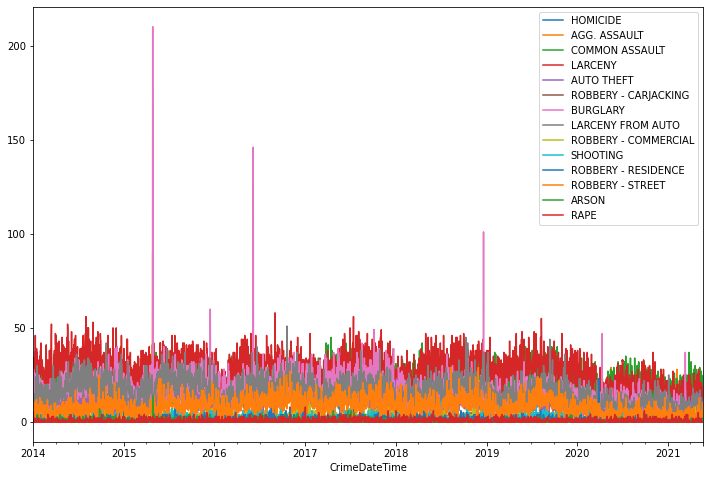

In [107]:
## Plot the weekly dataset to identify which ts to model
ax = df.plot(figsize=(12,8)) 
ax.legend(bbox_to_anchor=[1,1])

> For modeling purposes, we are going to focus on **Weekly crime** forecasts instead of daily, so we will resample to Weekly freq.

In [108]:
## Lets resample the df to Weekly and save as new dfw
# also, let's take 2018 - present for ~3 years of data
dfw = df.resample('W').sum().loc['2017':]

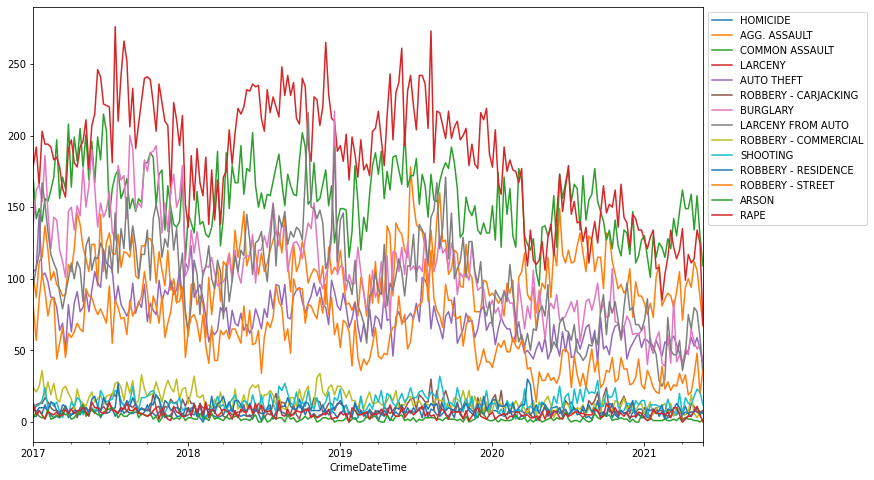

In [109]:
## Plot the weekly dataset to identify which ts to model
ax = dfw.plot(figsize=(12,8)) 
ax.legend(bbox_to_anchor=[1,1])

> #### Theres a lot of lines to sift through so lets use plotly express to make it easier


In [110]:
# use px.line 
px.line(dfw, template='plotly_dark')

- Before we dive into modeling crime, let's discuss the simplest time series models. 

# Basic Time Series models

## Simplest Time Series Models

- White Noise Model
- Random Walk Model

### White Noise Model
- 3 Properties:
    - Fixed and constant mean
    - Fixed and constant variance
    - No correlation over time

$$\Large Y_t =  \epsilon_t$$

The error term is randomly distributed around the mean, has constant variance, and no autocorrelation.

- Gaussian White Noise: A special case of a White Noise model is 
    - Mean is equal to zero
    - variance is equal to 1
    $$\large Y_t = \epsilon_t + \theta * \epsilon_{t-1}$$

(-0.018243696376393018, 0.982745991501395)

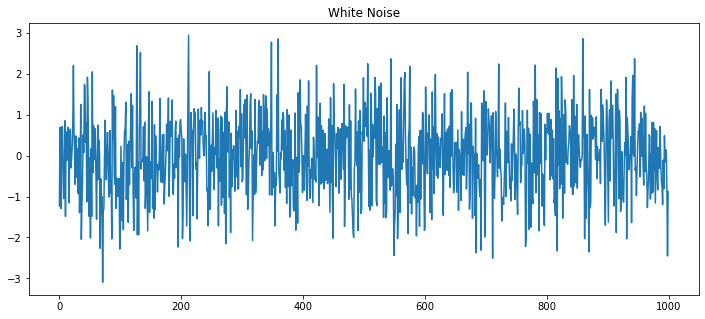

In [111]:
## White noise has mean=0, variance =1
mean = 0
variance = 1

## Make a white noise time series
noise = pd.Series([gauss(mean, np.sqrt(variance)) for x in range(1000)])
noise.plot(title='White Noise')

## Check our mean and variance
noise.mean(),noise.var()

#### Verify White Noise 

##### From 2015 scipy conference paper https://conference.scipy.org/proceedings/scipy2015/pdfs/margaret_mahan.pdf
- Use windows of 10% to asses white noise

In [112]:
## Calc 10% of time steps/lags
window = round(len(noise)*.1)
window

100

Test Statistic  #Lags Used  # of Observations Used  \
AD Fuller Results         -21.216           1                     998   

                   p-value  p<.05  Stationary?  
AD Fuller Results      0.0   True         True

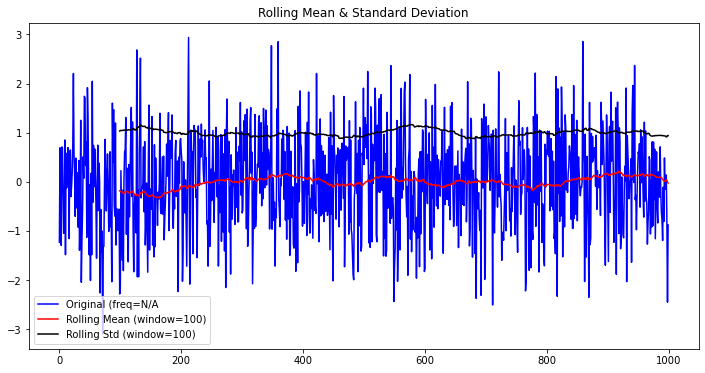

In [113]:
## Check if white noise
tsf.stationarity_check(noise,window=window); 

### Random Walk Model
- Two Properties:
    - Has no specified mean or variance
    - Has a strong dependence over time

- Mathematically, this can be written as:

$$\large Y_t = Y_{t-1} + \epsilon_t$$

- Where $\epsilon_t$ is a *mean zero* white noise model

- Random Walk with a Drift":
    - a drift parameter $c$, steering in a certain direction.
$$\large Y_t = c + Y_{t-1} + \epsilon_t$$

<AxesSubplot:>

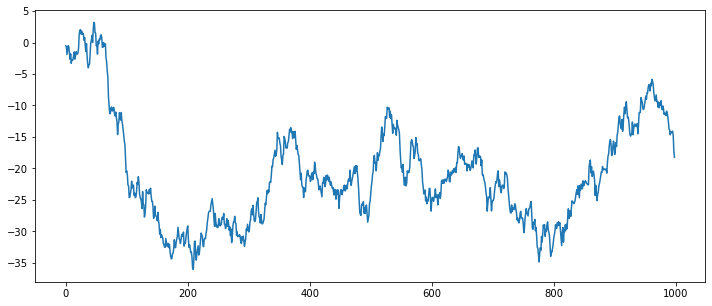

In [114]:
## Using white noise to simulate a random walk
#https://campus.datacamp.com/courses/time-series-analysis-in-python/some-simple-time-series?ex=7
walk = noise.shift(-1)+noise.cumsum()
walk.plot()

Test Statistic  #Lags Used  # of Observations Used  \
AD Fuller Results             NaN           0                     999   

                   p-value  p<.05  Stationary?  
AD Fuller Results      NaN  False        False

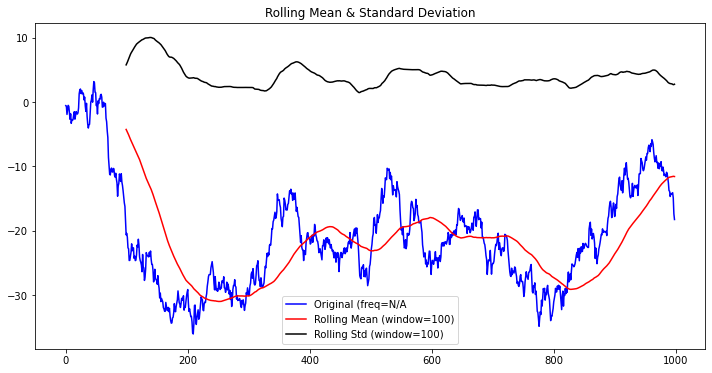

Test Statistic  #Lags Used  # of Observations Used  \
AD Fuller Results             NaN           0                     999   

                   p-value  p<.05  Stationary?  
AD Fuller Results      NaN  False        False

In [115]:
## Check if random walk is stationary
tsf.stationarity_check(walk,window=100)

- When a random walk is differenced it returns a white noise. 

This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Test Statistic  #Lags Used  # of Observations Used  \
AD Fuller Results          -21.19           1                     996   

                   p-value  p<.05  Stationary?  
AD Fuller Results      0.0   True         True

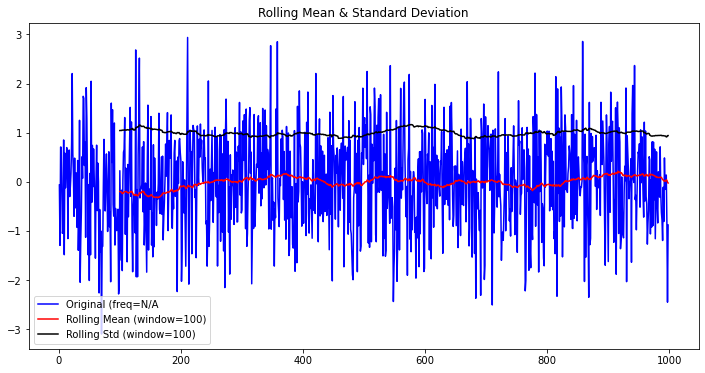

(-0.017738730876829225, 0.9827306393906265)

In [116]:
## Confirm walk differenced returns a white noise
walk_diff = walk.diff().dropna()
tsf.stationarity_check(walk_diff,window=100)
walk_diff.mean(),walk_diff.var()

## Finding Basic Time Series in Baltimore Crimes

### Identifying Crimes Optimal for Different Types of Times Series Models


- Using the plotly plot, explore individual crimes to identify which crimes are appropriate for the different types of time series models.
- Then confirm using stationarity check

- White Noise: ___
- Random Walk: ___

In [117]:
## re-plot dfw and identify crimes that follow a white nosie or random walk model
px.line(dfw,template='plotly_dark')

In [118]:
### Identifying Crimes Optimal for Different Types of Times Series Models
ts_cols = {'random walk':dfw['LARCENY'],
          'white noise':dfw['HOMICIDE']}#,
#           'seasonal':dfw['SHOOTING']#"LARCENY"}

### Check Our White Noise Crime

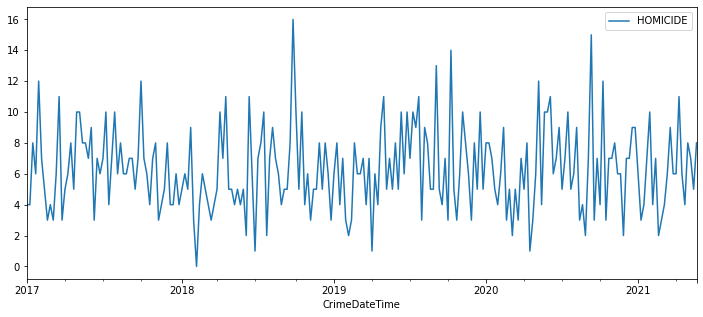

In [119]:
## Visualize white noise-like ts
ts = ts_cols['white noise']
ax = ts.plot()
ax.legend()

Test Statistic  #Lags Used  # of Observations Used  \
AD Fuller Results         -14.903           0                     229   

                     p-value  p<.05  Stationary?  
AD Fuller Results  1.497e-27   True         True

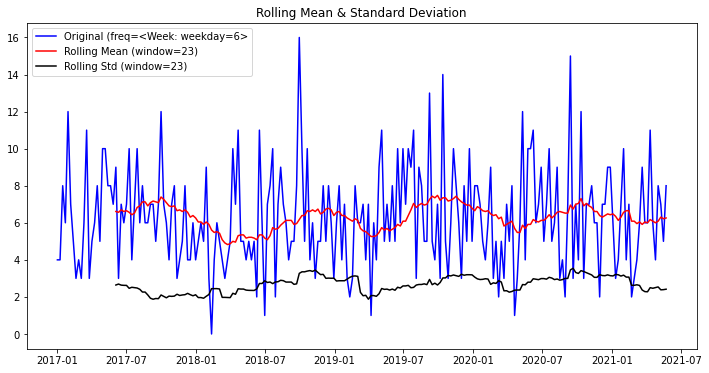

Test Statistic  #Lags Used  # of Observations Used  \
AD Fuller Results         -14.903           0                     229   

                     p-value  p<.05  Stationary?  
AD Fuller Results  1.497e-27   True         True

In [120]:
## Calculate 10% window and check stationarity
window = round(len(ts)*.1)
tsf.stationarity_check(ts,window=window)

### Check Our Random Walk Crime

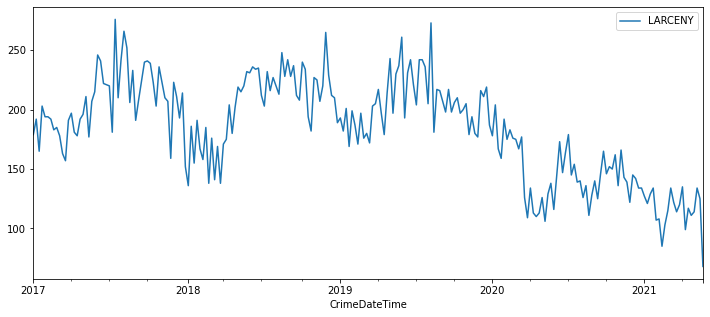

In [121]:
## Visualize random-walk ts
ts = ts_cols['random walk']#.loc['2018':]
ax = ts.plot()
ax.legend()

In [122]:
ts

CrimeDateTime
2017-01-01 00:00:00+00:00    179
2017-01-08 00:00:00+00:00    192
2017-01-15 00:00:00+00:00    165
2017-01-22 00:00:00+00:00    203
2017-01-29 00:00:00+00:00    194
                            ... 
2021-04-25 00:00:00+00:00    111
2021-05-02 00:00:00+00:00    114
2021-05-09 00:00:00+00:00    134
2021-05-16 00:00:00+00:00    125
2021-05-23 00:00:00+00:00     68
Freq: W-SUN, Name: LARCENY, Length: 230, dtype: int64

Test Statistic  #Lags Used  # of Observations Used  \
AD Fuller Results          -1.528           2                     227   

                   p-value  p<.05  Stationary?  
AD Fuller Results    0.519  False        False

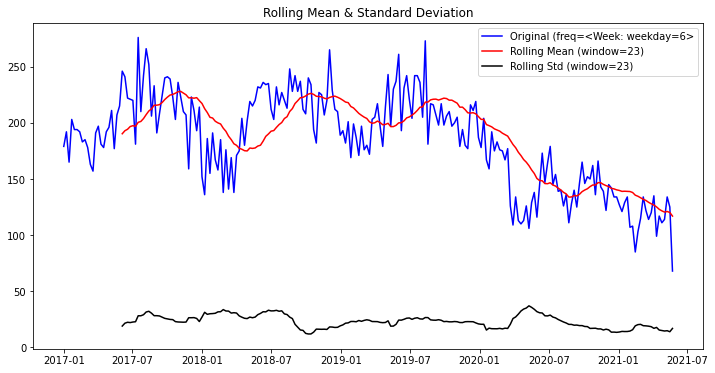

Test Statistic  #Lags Used  # of Observations Used  \
AD Fuller Results          -1.528           2                     227   

                   p-value  p<.05  Stationary?  
AD Fuller Results    0.519  False        False

In [123]:
## Check if our random walk is stationary
tsf.stationarity_check(ts, window=window)

Test Statistic  #Lags Used  # of Observations Used  \
AD Fuller Results         -17.019           1                     227   

                     p-value  p<.05  Stationary?  
AD Fuller Results  8.480e-30   True         True

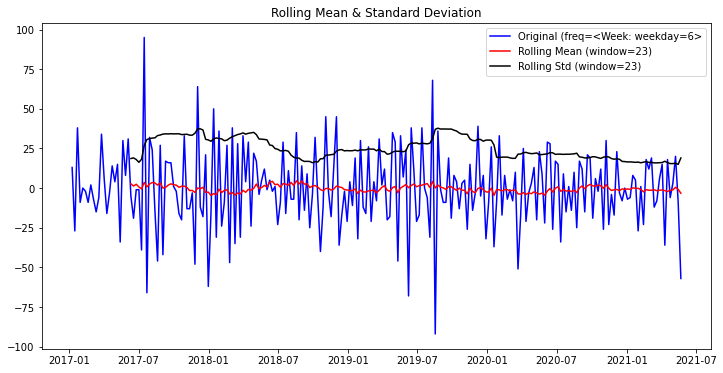

mean    -0.485
std     24.982
Name: LARCENY, dtype: float64

In [124]:
## confirm our random walk becomes stationary white noise
tsf.stationarity_check(ts.diff().dropna(), window=window)
ts.diff().dropna().agg(['mean','std'])

# Correlation, Autocorrelation & Partial Autocorrelation

> Time Series that are correlated with themselves (autocorrelation) are best suited for a more complex modeling approach.

In [125]:
# px.line(dfw)

## Exploring Autocorrelation 

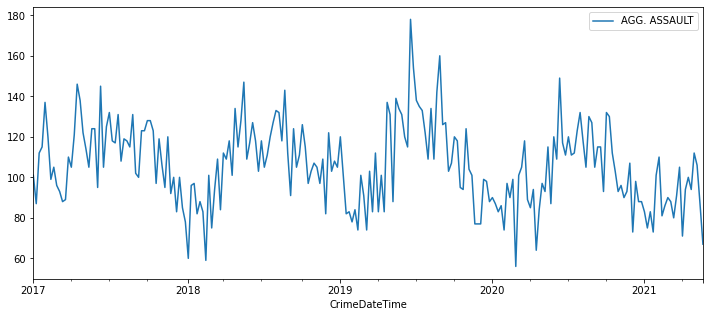

In [126]:
## Use AGG. ASSAULT as ts and plot
crime = "AGG. ASSAULT"
ts = dfw[crime]
ts.plot()
plt.legend()

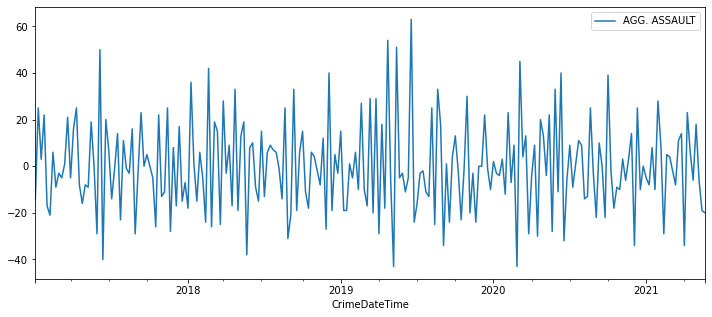

In [127]:
## Save differenced version and plot
ts_diff = ts.diff().dropna()
ts_diff.plot()
plt.legend()

AGG. ASSAULT     -1
AGG. ASSAULT         1.000  0.527
-1                   0.527  1.000

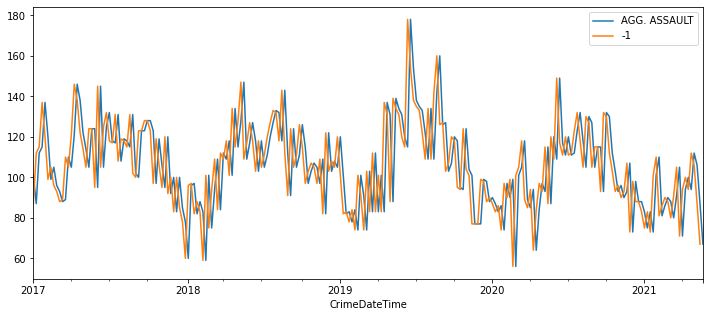

In [128]:
## Shift the ts_diff by -1 time lag
lag = -1
ts_shift = ts.shift(lag).dropna().rename(f'{lag}')

## Plot original ts vs shifted
ax = ts.plot()

ts_shift.plot()
ax.legend()
pd.concat([ts,ts_shift],axis=1).dropna().corr()

In [129]:
## Shift the orig ts from -1 to -52 lags

lags = list(range(-1,-53,-1))
shifted_ts = pd.concat([ts.shift(lag).rename(f'{lag}') for lag in lags],axis=1)

## Concatenate ts_diff and shifted_ts
ts_corrs = pd.concat([ts,shifted_ts], axis=1)
# ts_corrs = ts_corrs.dropna()
ts_corrs

AGG. ASSAULT     -1     -2     -3     -4     -5  \
CrimeDateTime                                                                
2017-01-01 00:00:00+00:00           101   87.0  112.0  115.0  137.0  120.0   
2017-01-08 00:00:00+00:00            87  112.0  115.0  137.0  120.0   99.0   
2017-01-15 00:00:00+00:00           112  115.0  137.0  120.0   99.0  105.0   
2017-01-22 00:00:00+00:00           115  137.0  120.0   99.0  105.0   96.0   
2017-01-29 00:00:00+00:00           137  120.0   99.0  105.0   96.0   93.0   
...                                 ...    ...    ...    ...    ...    ...   
2021-04-25 00:00:00+00:00            94  112.0  106.0   87.0   67.0    NaN   
2021-05-02 00:00:00+00:00           112  106.0   87.0   67.0    NaN    NaN   
2021-05-09 00:00:00+00:00           106   87.0   67.0    NaN    NaN    NaN   
2021-05-16 00:00:00+00:00            87   67.0    NaN    NaN    NaN    NaN   
2021-05-23 00:00:00+00:00            67    NaN    NaN    NaN    NaN    NaN   

                              -6     -7     -8     -9  ...    -43    -44  \
CrimeDateTime                                          ...                 
2017-01-01 00:00:00+00:00   99.0  105.0   96.0   93.0  ...  119.0  106.0   
2017-01-08 00:00:00+00:00  105.0   96.0   93.0   88.0  ...  106.0   95.0   
2017-01-15 00:00:00+00:00   96.0   93.0   88.0   89.0  ...   95.0  120.0   
2017-01-22 00:00:00+00:00   93.0   88.0   89.0  110.0  ...  120.0   92.0   
2017-01-29 00:00:00+00:00   88.0   89.0  110.0  105.0  ...   92.0  100.0   
...                          ...    ...    ...    ...  ...    ...    ...   
2021-04-25 00:00:00+00:00    NaN    NaN    NaN    NaN  ...    NaN    NaN   
2021-05-02 00:00:00+00:00    NaN    NaN    NaN    NaN  ...    NaN    NaN   
2021-05-09 00:00:00+00:00    NaN    NaN    NaN    NaN  ...    NaN    NaN   
2021-05-16 00:00:00+00:00    NaN    NaN    NaN    NaN  ...    NaN    NaN   
2021-05-23 00:00:00+00:00    NaN    NaN    NaN    NaN  ...    NaN    NaN   

                             -45    -46    -47    -48    -49    -50   -51  \
CrimeDateTime                                                               
2017-01-01 00:00:00+00:00   95.0  120.0   92.0  100.0   83.0  100.0  85.0   
2017-01-08 00:00:00+00:00  120.0   92.0  100.0   83.0  100.0   85.0  78.0   
2017-01-15 00:00:00+00:00   92.0  100.0   83.0  100.0   85.0   78.0  60.0   
2017-01-22 00:00:00+00:00  100.0   83.0  100.0   85.0   78.0   60.0  96.0   
2017-01-29 00:00:00+00:00   83.0  100.0   85.0   78.0   60.0   96.0  97.0   
...                          ...    ...    ...    ...    ...    ...   ...   
2021-04-25 00:00:00+00:00    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
2021-05-02 00:00:00+00:00    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
2021-05-09 00:00:00+00:00    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
2021-05-16 00:00:00+00:00    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
2021-05-23 00:00:00+00:00    NaN    NaN    NaN    NaN    NaN    NaN   NaN   

                            -52  
CrimeDateTime                    
2017-01-01 00:00:00+00:00  78.0  
2017-01-08 00:00:00+00:00  60.0  
2017-01-15 00:00:00+00:00  96.0  
2017-01-22 00:00:00+00:00  97.0  
2017-01-29 00:00:00+00:00  82.0  
...                         ...  
2021-04-25 00:00:00+00:00   NaN  
2021-05-02 00:00:00+00:00   NaN  
2021-05-09 00:00:00+00:00   NaN  
2021-05-16 00:00:00+00:00   NaN  
2021-05-23 00:00:00+00:00   NaN  

[230 rows x 53 columns]

In [130]:
# ts_corrs.corr().loc[crime].plot()#.style.background_gradient()

AGG. ASSAULT     -1
AGG. ASSAULT         1.000 -0.475
-1                  -0.475  1.000

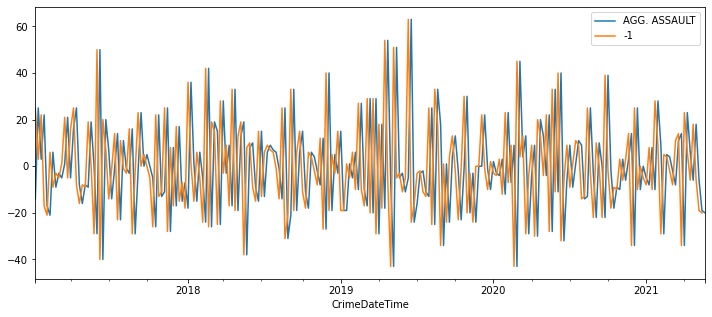

In [131]:
## Shift the ts_diff by -1 time lag
lag = -1
ts_shift = ts_diff.shift(lag).dropna().rename(f'{lag}')

## Plot original ts vs shifted
ax = ts_diff.plot()
ts_shift.plot()
ax.legend()
pd.concat([ts_diff,ts_shift],axis=1).dropna().corr()

In [132]:
## Shift the orig ts from -1 to -52 lags

lags = list(range(-1,-53,-1))
shifted_ts = pd.concat([ts_diff.shift(lag).rename(f'{lag}') for lag in lags],axis=1)

## Concatenate ts_diff and shifted_ts
ts_corrs = pd.concat([ts_diff,shifted_ts], axis=1)
# ts_corrs = ts_corrs.dropna()
ts_corrs

AGG. ASSAULT    -1    -2    -3    -4    -5   -6  \
CrimeDateTime                                                                
2017-01-08 00:00:00+00:00         -14.0  25.0   3.0  22.0 -17.0 -21.0  6.0   
2017-01-15 00:00:00+00:00          25.0   3.0  22.0 -17.0 -21.0   6.0 -9.0   
2017-01-22 00:00:00+00:00           3.0  22.0 -17.0 -21.0   6.0  -9.0 -3.0   
2017-01-29 00:00:00+00:00          22.0 -17.0 -21.0   6.0  -9.0  -3.0 -5.0   
2017-02-05 00:00:00+00:00         -17.0 -21.0   6.0  -9.0  -3.0  -5.0  1.0   
...                                 ...   ...   ...   ...   ...   ...  ...   
2021-04-25 00:00:00+00:00          -6.0  18.0  -6.0 -19.0 -20.0   NaN  NaN   
2021-05-02 00:00:00+00:00          18.0  -6.0 -19.0 -20.0   NaN   NaN  NaN   
2021-05-09 00:00:00+00:00          -6.0 -19.0 -20.0   NaN   NaN   NaN  NaN   
2021-05-16 00:00:00+00:00         -19.0 -20.0   NaN   NaN   NaN   NaN  NaN   
2021-05-23 00:00:00+00:00         -20.0   NaN   NaN   NaN   NaN   NaN  NaN   

                             -7    -8    -9  ...   -43   -44   -45   -46  \
CrimeDateTime                                ...                           
2017-01-08 00:00:00+00:00  -9.0  -3.0  -5.0  ... -13.0 -11.0  25.0 -28.0   
2017-01-15 00:00:00+00:00  -3.0  -5.0   1.0  ... -11.0  25.0 -28.0   8.0   
2017-01-22 00:00:00+00:00  -5.0   1.0  21.0  ...  25.0 -28.0   8.0 -17.0   
2017-01-29 00:00:00+00:00   1.0  21.0  -5.0  ... -28.0   8.0 -17.0  17.0   
2017-02-05 00:00:00+00:00  21.0  -5.0  16.0  ...   8.0 -17.0  17.0 -15.0   
...                         ...   ...   ...  ...   ...   ...   ...   ...   
2021-04-25 00:00:00+00:00   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
2021-05-02 00:00:00+00:00   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
2021-05-09 00:00:00+00:00   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
2021-05-16 00:00:00+00:00   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
2021-05-23 00:00:00+00:00   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   

                            -47   -48   -49   -50   -51   -52  
CrimeDateTime                                                  
2017-01-08 00:00:00+00:00   8.0 -17.0  17.0 -15.0  -7.0 -18.0  
2017-01-15 00:00:00+00:00 -17.0  17.0 -15.0  -7.0 -18.0  36.0  
2017-01-22 00:00:00+00:00  17.0 -15.0  -7.0 -18.0  36.0   1.0  
2017-01-29 00:00:00+00:00 -15.0  -7.0 -18.0  36.0   1.0 -15.0  
2017-02-05 00:00:00+00:00  -7.0 -18.0  36.0   1.0 -15.0   6.0  
...                         ...   ...   ...   ...   ...   ...  
2021-04-25 00:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN  
2021-05-02 00:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN  
2021-05-09 00:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN  
2021-05-16 00:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN  
2021-05-23 00:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN  

[229 rows x 53 columns]

<AxesSubplot:>

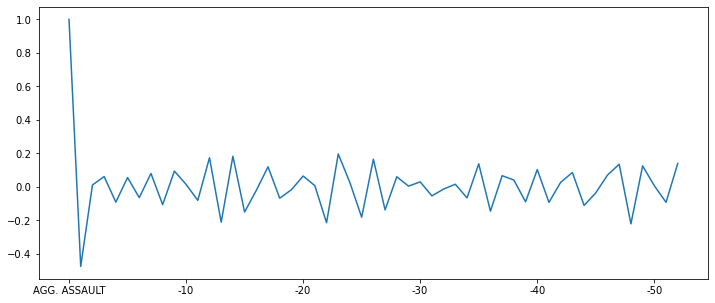

In [133]:
## Plot the correlations 
ts_corrs.corr().loc[crime].plot()#.style.background_gradient()

## ACF & PACF  Plots

### Autocorrelation Function Plots

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

> - "The **autocorrelation function** is a function that represents autocorrelation of a time series as a function of the time lag."
- The autocorrelation function tells interesting stories about trends and seasonality. For example, if the original time series repeats itself every five days, you would expect to see a spike in the autocorrelation function at 5 days.



<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

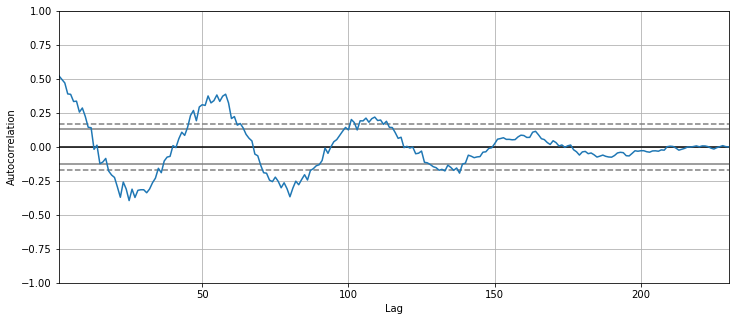

In [134]:
## Use panda's autocorrelation plot on the ts
pd.plotting.autocorrelation_plot(ts)

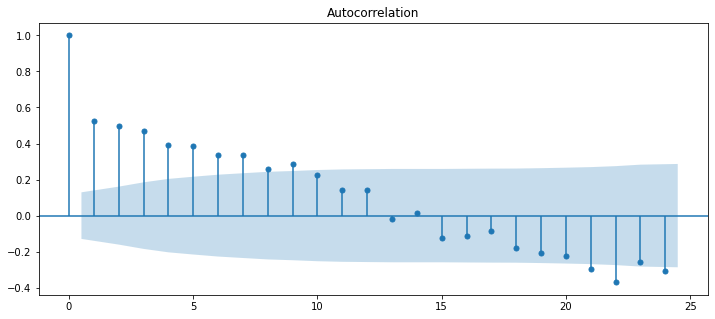

In [138]:
## Use statsmodels ACF plot on ts
tsa.graphics.plot_acf(ts);

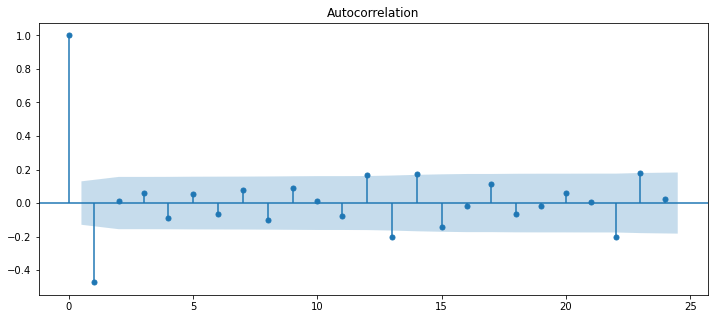

In [139]:
## Use plot_acf on ts_diff
tsa.graphics.plot_acf(ts_diff);

### Partial-Autocorrelation Function Plot


> "The **partial autocorrelation function** can be interpreted as a regression of the series against its past lags.
 
 > It helps you come up with a possible order for the auto regressive term. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant. "

In [ ]:
## Use plot_pacf on ts
tsa.graphics.plot_pacf(ts,lags=52);

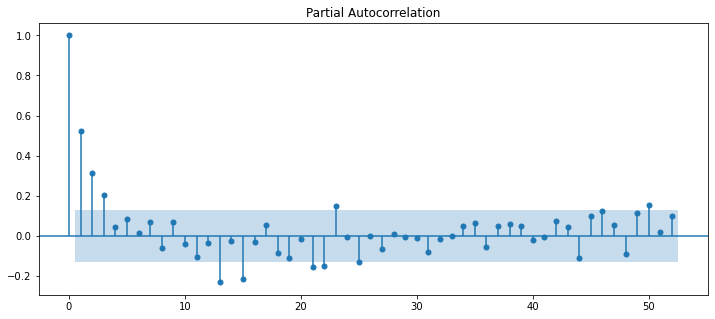

In [140]:
## Use plot_pacf on ts_diff
tsa.graphics.plot_pacf(ts_diff,lags=52);

### def  `plot_acf_pacf`

In [36]:
def plot_acf_pacf(ts,figsize=(9,6),suptitle=None,sup_y = 1.01):
    """Plot pacf and acf using statsmodels"""
    fig,axes=plt.subplots(nrows=2,figsize=figsize)
    
    tsa.graphics.plot_acf(ts,ax=axes[0]);
    tsa.graphics.plot_pacf(ts,ax=axes[1]);
    
    ## Add grid
    [ax.grid(axis='x',which='both') for ax in axes]
    
    if suptitle is not None:
        fig.suptitle(suptitle,y=sup_y,fontweight='bold',fontsize=15)
        
    fig.tight_layout()
    return fig,ax
    

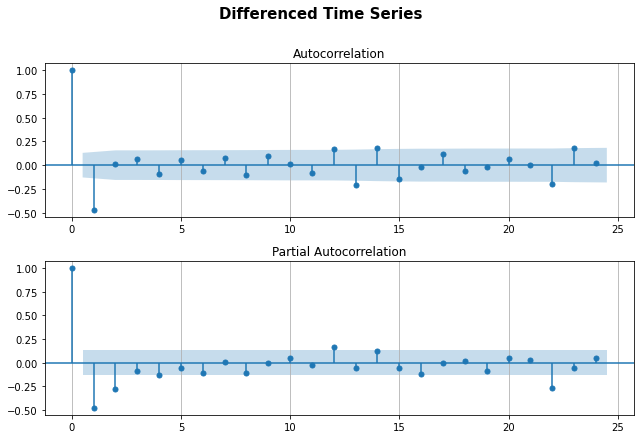

In [37]:
## Use function on differenced data
f,a = plot_acf_pacf(ts_diff,suptitle='Differenced Time Series',)

In [ ]:
## Use function on original data
f,a = plot_acf_pacf(ts,suptitle='Raw Time Series')

> When time series show autocorrelation, it is an indicator to use more complex time series models.

#  Time Series Modeling with `statsmodels`

## AR/MA MODELS

### Autoregressive Model (AR)



An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series.

In words, the mathematical idea is the following:

$$ \text{Today = constant + slope} \times \text{yesterday + noise} $$

Or, mathematically:
$$\large Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

Some notes based on this formula:
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follows an oscillatory process


<!---

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-arma-models-online-ds-pt-100719/master/images/AR_model.png">

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-arma-models-online-ds-pt-100719/master/images/AR_PACF.png"> --->

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           AGG. ASSAULT   No. Observations:                  229
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -974.318
Date:                Sat, 29 May 2021   AIC                           1954.635
Time:                        19:04:03   BIC                           1964.936
Sample:                    01-08-2017   HQIC                          1958.791
                         - 05-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1006      0.781     -0.129      0.898      -1.632       1.431
ar.L1         -0.4746      0.059     -8.060      0.000      -0.590      -0.359
sigma2       290.1657     27.956     10.379      0.000     235.374     344.958
===================================================================================
Ljung-Box (L1) (Q):                   4.12   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.04   Prob(JB):                         0.38
Heteroskedasticity (H):               1.00   Skew:                             0.22
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

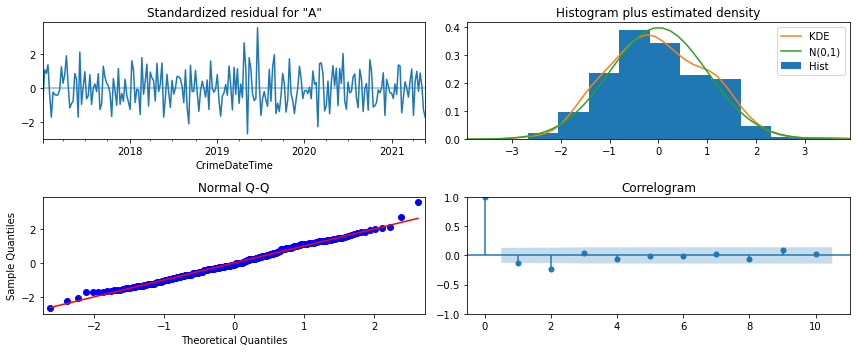

In [39]:
## Fit an AR model (using ARIMA with order (1,0,0))
# model = tsa.arima.ARIMA(ts_diff, order=(1,0,0)).fit()
model = tsa.arima.ARIMA(ts_diff, order=(1,0,0)).fit()

## Display mode. summary and plot diagnostics
display(model.summary())

model.plot_diagnostics();
plt.tight_layout()

In [40]:
## funtionize diagnosing
def diagnose_model(model):
    """Takes a fit statsmodels model and displays the .summary 
    and plots the built-in plot.diagnostics()"""
    display(model.summary())
    model.plot_diagnostics();
    plt.tight_layout()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           AGG. ASSAULT   No. Observations:                  229
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -974.318
Date:                Sat, 29 May 2021   AIC                           1954.635
Time:                        19:04:04   BIC                           1964.936
Sample:                    01-08-2017   HQIC                          1958.791
                         - 05-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1006      0.781     -0.129      0.898      -1.632       1.431
ar.L1         -0.4746      0.059     -8.060      0.000      -0.590      -0.359
sigma2       290.1657     27.956     10.379      0.000     235.374     344.958
===================================================================================
Ljung-Box (L1) (Q):                   4.12   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.04   Prob(JB):                         0.38
Heteroskedasticity (H):               1.00   Skew:                             0.22
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

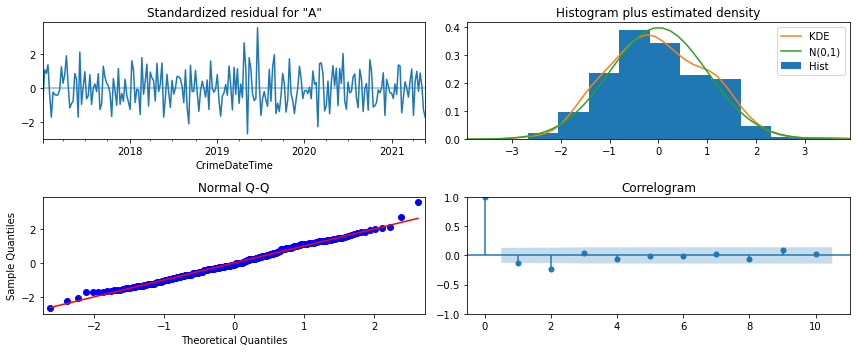

In [41]:
## Repeat model and diagnose
ar1_model = tsa.arima.ARIMA(ts_diff, order=(1,0,0)).fit()
diagnose_model(ar1_model)

### The  Moving Average Model




The Moving Average model can be described as the weighted sum of today's and yesterday's noise.

In words, the mathematical idea is the following:

$$ \text{Today = Mean + Noise + Slope} \times \text{yesterday's noise} $$

Or, mathematically:
$$\large Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

Some notes based on this formula:
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated and depends on the previous white noise process
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follow an oscillatory process


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           AGG. ASSAULT   No. Observations:                  229
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -961.298
Date:                Sat, 29 May 2021   AIC                           1928.596
Time:                        19:04:05   BIC                           1938.898
Sample:                    01-08-2017   HQIC                          1932.752
                         - 05-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0767      0.382     -0.201      0.841      -0.825       0.671
ma.L1         -0.6595      0.054    -12.291      0.000      -0.765      -0.554
sigma2       258.5887     24.780     10.435      0.000     210.021     307.156
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 6.61
Prob(Q):                              0.82   Prob(JB):                         0.04
Heteroskedasticity (H):               0.91   Skew:                             0.41
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

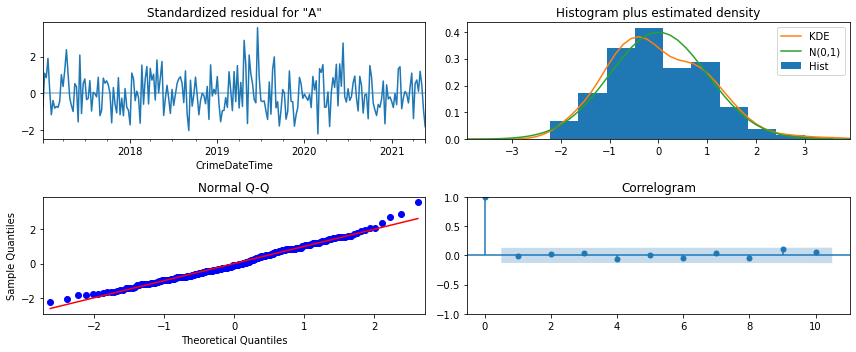

In [42]:
## Fit a MA 1 ARIMA(0,0,1)
ma1_model = tsa.arima.ARIMA(ts_diff,order=(0,0,1)).fit()
diagnose_model(ma1_model);

### Which is performing better? (Use AIC)

In [43]:
## can compare via the aic
print(f'AR1 Model aic = {ar1_model.aic:.3f}')
print(f'MA1 Model aic = {ma1_model.aic:.3f}')

AR1 Model aic = 1954.635
MA1 Model aic = 1928.596


### Higher-order AR and MA models


- We are not limited to using just one time-step in our models. 
- The number of time steps used is called the **order** of the model.

#### First Order AR/MA Models:

- AR: $$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$
- MA: $$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

#### Second-Order AR/MA Models

- AR(2): $$Y_t = \mu + \phi_1 * Y_{t-1}+\phi_2 * Y_{t-2}+\epsilon_t$$
- MA(2): $$Y_t = \mu +\epsilon_t + \theta_1 * \epsilon_{t-1}+ \theta_2 * \epsilon_{t-2}$$



#### Number of AR (Auto-Regressive) terms (`p`): 

- `p` is the auto-regressive part of the model. It indicates how many AR coefficients should be included based on `p` # of timesteps/lags.
    -  For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

#### Number of MA (Moving Average) terms (q): 

- `q` is the moving average part of the model which is used to set the error of the model as a linear combination of the error values observed at previous time points in the past.
    -  For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where `e(i)` is the difference between the moving average at ith instant and actual value.

### Create a New  AR/MA model (depending on AIC of previous models) using a higher order

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           AGG. ASSAULT   No. Observations:                  229
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -961.256
Date:                Sat, 29 May 2021   AIC                           1930.512
Time:                        19:04:05   BIC                           1944.247
Sample:                    01-08-2017   HQIC                          1936.053
                         - 05-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0762      0.392     -0.194      0.846      -0.844       0.692
ma.L1         -0.6718      0.065    -10.273      0.000      -0.800      -0.544
ma.L2          0.0190      0.066      0.287      0.774      -0.111       0.149
sigma2       258.4880     25.361     10.193      0.000     208.782     308.194
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.25
Prob(Q):                              0.97   Prob(JB):                         0.04
Heteroskedasticity (H):               0.91   Skew:                             0.40
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

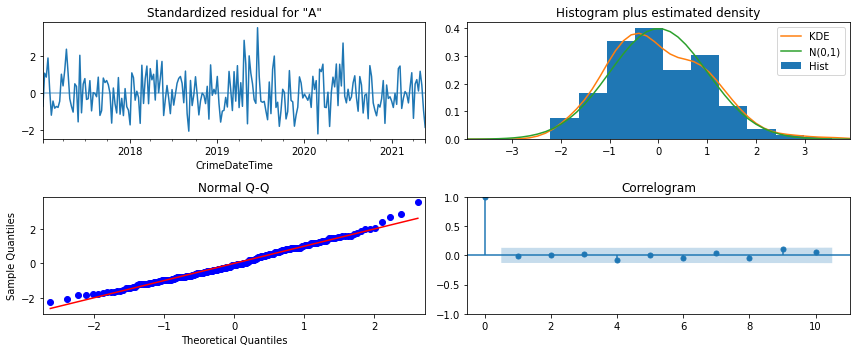

In [44]:
## Repeat model and diagnose
ar1_model = tsa.arima.ARIMA(ts_diff, order=(0,0,2)).fit()
diagnose_model(ar1_model)

#### Q: Did the model improve? What if we weren't limited to just AR or just MA?...

## ARMA & ARIMA Models

- We can combine BOTH an AR and MA model into one using an using an **AutoregRessive Moving Average** model (ARMA model).
    - We need to determine best number of p's and q's to use. 
- In actuality, we will go straight to using a slightly more advanced version of ARMA, which will actually difference our time series for us, allowing us to use the raw original ts for training. 
    

###  ARIMA Time Series Model

One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for **AutoregRessive Integrated Moving Average**. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.


>- **An ARIMA is specified with (`p`,`d`,`q`)**
    - Number of AR (Auto-Regressive) terms (p)
    - Number of Differences (`d`):
        - `d` is the **Integrated** component of an ARIMA model. The number of lag values to subtract from the current observation (aka differencing). 
    - Number of MA (Moving Average) terms ($q$)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           AGG. ASSAULT   No. Observations:                  229
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -961.255
Date:                Sat, 29 May 2021   AIC                           1930.509
Time:                        19:04:06   BIC                           1944.244
Sample:                    01-08-2017   HQIC                          1936.050
                         - 05-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0765      0.392     -0.195      0.845      -0.845       0.692
ar.L1         -0.0299      0.101     -0.297      0.767      -0.227       0.167
ma.L1         -0.6424      0.084     -7.635      0.000      -0.807      -0.477
sigma2       258.4864     25.327     10.206      0.000     208.845     308.127
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.24
Prob(Q):                              0.98   Prob(JB):                         0.04
Heteroskedasticity (H):               0.91   Skew:                             0.40
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

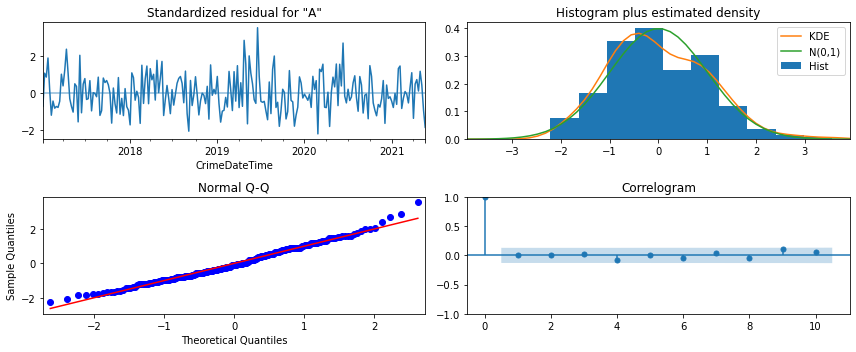

In [45]:
## Make an ARMA model with p=1, q=1
arma_model = tsa.arima.ARIMA(ts_diff, order=(1,0,1)).fit()
diagnose_model(arma_model)

## Determining the model and order to use via PACF/ACF _(if you can)_

- I've heard many different rules of thumb on how to use the PACF/ACF plots from earlier to determine whether to use AR/MA and how many p/q's to use. 
    - In my experience, it is rarely easy to see an obvious answer from these plots and it is better to use a gridsearch to determine the best performing model.
    - I have also heard competing answers on whether you should use the PACF/ACF for the original time series of the differenced time series.
    
- That all being said...

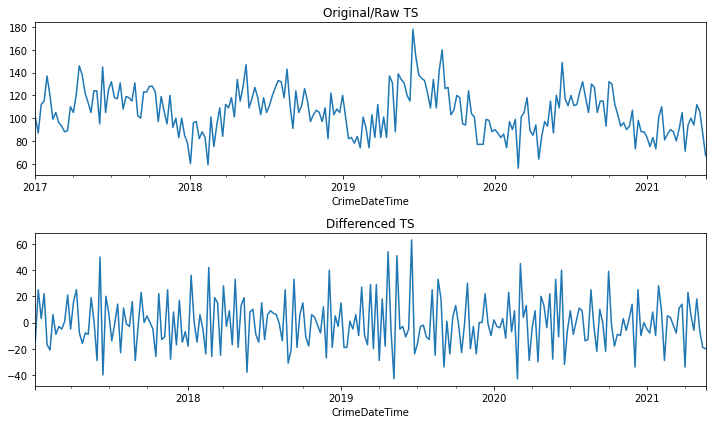

In [46]:
## PLotting the original vs differenced timeseires
fig,axes = plt.subplots(nrows=2, figsize=(10,6))
ts.plot(ax=axes[0],title='Original/Raw TS')
ts_diff.plot(ax=axes[1],title='Differenced TS')
plt.tight_layout()

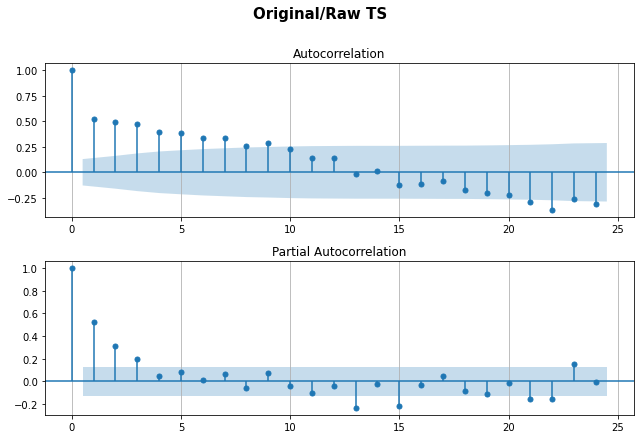

In [47]:
## Plot raw time series PACF
fig_raw,axes = plot_acf_pacf(ts,suptitle='Original/Raw TS') #figsize=(10,4),

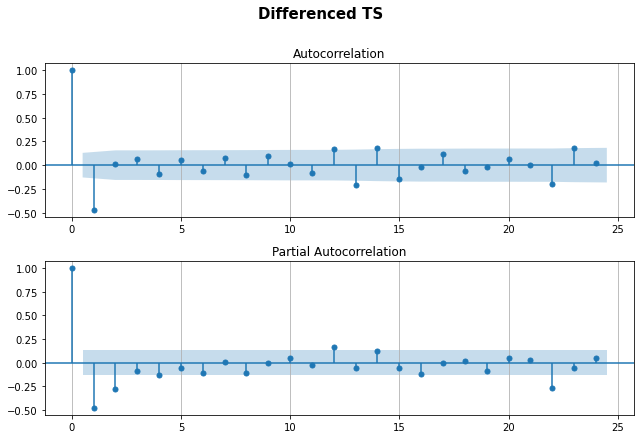

In [48]:
fig_diff,axes = plot_acf_pacf(ts_diff, suptitle='Differenced TS') #figsize=(10,4),

In [49]:
## Save both figures in a dictionary
fig_dict = {'raw':fig_raw, 'diff': fig_diff}

#### Determining AR(p) and MA(q) using PACF [FROM  CANVAS]

- AR(p):
    - ACF for AR(p) would be strong until lag of p, then stagnant, then trail off. 
    - PACF for AR(p): Generally no correlation for lag values beyond p.
- MA(q):
    - ACF for MA(q) would show strong correlation up to a lag of q, the immedately delcine to minimal/no correction.
    - PACF would show strong relationship to the lag and tailing off to no correlation afterwards.
   
- Notation is generally ARMA(p,q)
- Example: ARMA(2,1) model equation
     $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$

| Param| AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |
  parameters and use for prediction

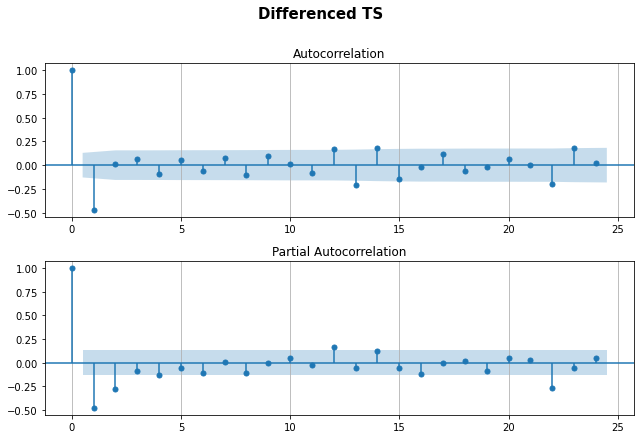

In [50]:
## Visualize either figure to look for the above
fig_dict['diff']

####  Determining AR(p) and MA(q) using PACF [INFO FROM UDEMY]

- **USE ACF TO JUDGE IF MA OR AR COMPONENTS:**
    - If lag 1 is positive: AR
    - If lag 1 is negatige: MA
    
- **PACF is best for picking AR (p)**
- **ACF is best for picking MA(q)**
    - If sharp drop off at lag of k (k= point on x axis) means use an AR model of order k.
    - If slow gradual decline: use MA
    
    

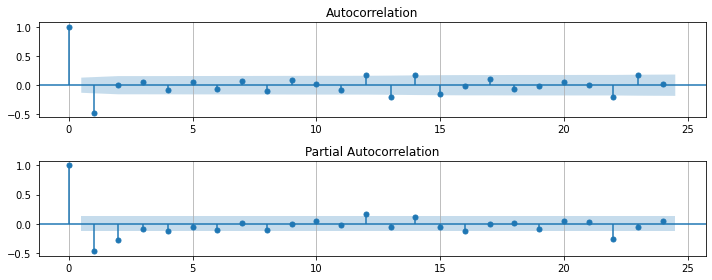

In [51]:
plot_acf_pacf(ts_diff,figsize=(10,4));

#### Determining AR(p) and MA(q) using PACF [Centra Lecturer]

<img src="../ds-time_series-main/img/armaguidelines.png" width=80%>

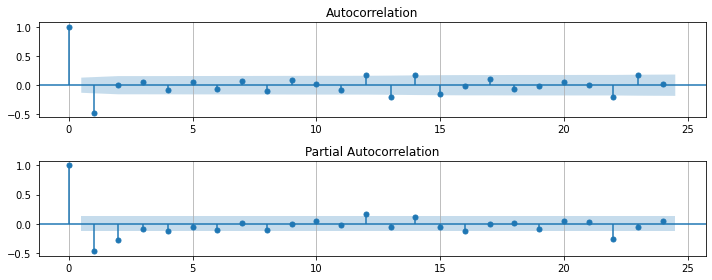

In [52]:
plot_acf_pacf(ts_diff,figsize=(10,4));

### Determining `p`,`d`,`q` programmatically

In [53]:
### From SARIMA Models Lab
import itertools
from tqdm.notebook import trange
# Define the p, d and q parameters to take any value between 0 and 2
ps = list(range(0,4))
ds = list(range(0,3))
qs = list(range(0, 4))

# Generate all different combinations of p, q and q triplets
pdq_list = list(itertools.product(ps, ds, qs))
print(pdq_list[:4])
len(pdq_list)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3)]


48

In [54]:
## Loop through pdq_list, make an ARIMA model
# save p,d,q and aic to a model_aic list
model_aics= [['p','d','q','aic']]
for i in  trange(len(pdq_list)):
    p,d,q = pdq_list[i]
    model = tsa.arima.ARIMA(ts,order=(p,d,q),
                            enforce_invertibility=False,
                           enforce_stationarity=True).fit()
    print(f'For ({p},{d},{q}), aic = {model.aic:.3f}')
    model_aics.append([p,d,q,model.aic])

## Make Results into a df and sort by aic
results = pd.DataFrame(model_aics[1:],columns=model_aics[0]).sort_values('aic')
results

For (0,0,0), aic = 2033.479
For (0,0,1), aic = 1990.869
For (0,0,2), aic = 1972.352
For (0,0,3), aic = 1955.406
For (0,1,0), aic = 2008.961
For (0,1,1), aic = 1926.641
For (0,1,2), aic = 1928.555
For (0,1,3), aic = 1930.518
For (0,2,0), aic = 2247.058
For (0,2,1), aic = 2008.611
For (0,2,2), aic = 1928.748
For (0,2,3), aic = 1930.622
For (1,0,0), aic = 1960.941
For (1,0,1), aic = 1930.210
For (1,0,2), aic = 1931.650
For (1,0,3), aic = 1933.610
For (1,1,0), aic = 1952.651
For (1,1,1), aic = 1928.552
For (1,1,2), aic = 1930.353


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



For (1,1,3), aic = 1932.482
For (1,2,0), aic = 2116.195
For (1,2,1), aic = 1953.326
For (1,2,2), aic = 1930.619
For (1,2,3), aic = 1932.479
For (2,0,0), aic = 1939.345
For (2,0,1), aic = 1931.686
For (2,0,2), aic = 1933.632
For (2,0,3), aic = 1934.643
For (2,1,0), aic = 1935.954
For (2,1,1), aic = 1930.536
For (2,1,2), aic = 1931.702
For (2,1,3), aic = 1929.173
For (2,2,0), aic = 2044.050
For (2,2,1), aic = 1937.201
For (2,2,2), aic = 1932.615
For (2,2,3), aic = 1933.720
For (3,0,0), aic = 1932.458
For (3,0,1), aic = 1933.528
For (3,0,2), aic = 1935.602


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



For (3,0,3), aic = 1930.045
For (3,1,0), aic = 1935.784
For (3,1,1), aic = 1931.988
For (3,1,2), aic = 1932.765
For (3,1,3), aic = 1936.451
For (3,2,0), aic = 2019.735
For (3,2,1), aic = 1937.225
For (3,2,2), aic = 1934.115
For (3,2,3), aic = 1935.377



/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



p  d  q       aic
5   0  1  1  1926.641
17  1  1  1  1928.552
6   0  1  2  1928.555
10  0  2  2  1928.748
31  2  1  3  1929.173
39  3  0  3  1930.045
13  1  0  1  1930.210
18  1  1  2  1930.353
7   0  1  3  1930.518
29  2  1  1  1930.536
22  1  2  2  1930.619
11  0  2  3  1930.622
14  1  0  2  1931.650
25  2  0  1  1931.686
30  2  1  2  1931.702
41  3  1  1  1931.988
36  3  0  0  1932.458
23  1  2  3  1932.479
19  1  1  3  1932.482
34  2  2  2  1932.615
42  3  1  2  1932.765
37  3  0  1  1933.528
15  1  0  3  1933.610
26  2  0  2  1933.632
35  2  2  3  1933.720
46  3  2  2  1934.115
27  2  0  3  1934.643
47  3  2  3  1935.377
38  3  0  2  1935.602
40  3  1  0  1935.784
28  2  1  0  1935.954
43  3  1  3  1936.451
33  2  2  1  1937.201
45  3  2  1  1937.225
24  2  0  0  1939.345
16  1  1  0  1952.651
21  1  2  1  1953.326
3   0  0  3  1955.406
12  1  0  0  1960.941
2   0  0  2  1972.352
1   0  0  1  1990.869
9   0  2  1  2008.611
4   0  1  0  2008.961
44  3  2  0  2019.735
0   0  0  0  2033.479
32  2  2  0  2044.050
20  1  2  0  2116.195
8   0  2  0  2247.058

In [55]:
## Save best_params as a dict
best_params = results.iloc[0][['p','d','q']].to_dict()
best_params

{'p': 0.0, 'd': 1.0, 'q': 1.0}

In [56]:
tuple(best_params.values())

(0.0, 1.0, 1.0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           AGG. ASSAULT   No. Observations:                  230
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -961.321
Date:                Sat, 29 May 2021   AIC                           1926.641
Time:                        19:04:18   BIC                           1933.509
Sample:                    01-01-2017   HQIC                          1929.412
                         - 05-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6592      0.054    -12.279      0.000      -0.764      -0.554
sigma2       258.6277     23.904     10.819      0.000     211.777     305.479
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 6.61
Prob(Q):                              0.82   Prob(JB):                         0.04
Heteroskedasticity (H):               0.91   Skew:                             0.41
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

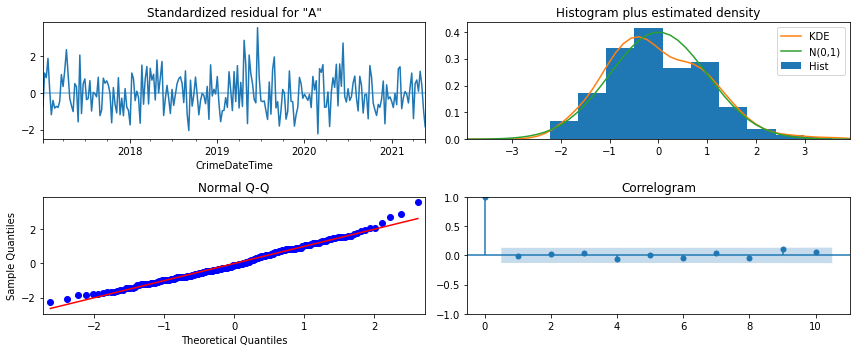

In [57]:
## Make a best_model using the best_params from our loop
best_model = tsa.arima.ARIMA(ts,order=tuple(best_params.values()),
                        enforce_invertibility=False,
                        enforce_stationarity=True).fit()
diagnose_model(best_model)

# Forecasts vs Predictions (`statsmodels`)

## Forecasts

`model.forecast()`/`model.get_forecast()` are designed for predictions **after the training data**. It needs the # of time steps in the future to forecast. 
- `model.forecast()` will return JUST the mean value for the forecast.


- `forecast = model.get_forecast()` will return a special `PredictionResultsWrapper` object that contains:
    - `forecast.conf_int()`: the lower and upper limits of the confidence indterval (as a dataframe).
        ` forecast.predicted_mean`: the mean value of the forecast (returned as a series)

In [58]:
## forecast
best_model.forecast(12)

2021-05-30 00:00:00+00:00    86.574
2021-06-06 00:00:00+00:00    86.574
2021-06-13 00:00:00+00:00    86.574
2021-06-20 00:00:00+00:00    86.574
2021-06-27 00:00:00+00:00    86.574
2021-07-04 00:00:00+00:00    86.574
2021-07-11 00:00:00+00:00    86.574
2021-07-18 00:00:00+00:00    86.574
2021-07-25 00:00:00+00:00    86.574
2021-08-01 00:00:00+00:00    86.574
2021-08-08 00:00:00+00:00    86.574
2021-08-15 00:00:00+00:00    86.574
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [59]:
## get_forecast
forecast = best_model.get_forecast(12)
forecast

In [60]:
## Check out the pred's predicted_mean
forecast.predicted_mean

2021-05-30 00:00:00+00:00    86.574
2021-06-06 00:00:00+00:00    86.574
2021-06-13 00:00:00+00:00    86.574
2021-06-20 00:00:00+00:00    86.574
2021-06-27 00:00:00+00:00    86.574
2021-07-04 00:00:00+00:00    86.574
2021-07-11 00:00:00+00:00    86.574
2021-07-18 00:00:00+00:00    86.574
2021-07-25 00:00:00+00:00    86.574
2021-08-01 00:00:00+00:00    86.574
2021-08-08 00:00:00+00:00    86.574
2021-08-15 00:00:00+00:00    86.574
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [61]:
## check out pred's conf_int
forecast.conf_int()

lower AGG. ASSAULT  upper AGG. ASSAULT
2021-05-30 00:00:00+00:00              55.054             118.094
2021-06-06 00:00:00+00:00              53.274             119.874
2021-06-13 00:00:00+00:00              51.585             121.563
2021-06-20 00:00:00+00:00              49.973             123.175
2021-06-27 00:00:00+00:00              48.430             124.718
2021-07-04 00:00:00+00:00              46.946             126.201
2021-07-11 00:00:00+00:00              45.517             127.631
2021-07-18 00:00:00+00:00              44.135             129.013
2021-07-25 00:00:00+00:00              42.797             130.351
2021-08-01 00:00:00+00:00              41.498             131.649
2021-08-08 00:00:00+00:00              40.236             132.912
2021-08-15 00:00:00+00:00              39.008             134.140

In [62]:
## Get confidence intervals and predicted mean
forecast_df = forecast.conf_int()
forecast_df.columns = ['Lower CI','Upper CI']
forecast_df['Forecast'] = forecast.predicted_mean

forecast_df

Lower CI  Upper CI  Forecast
2021-05-30 00:00:00+00:00    55.054   118.094    86.574
2021-06-06 00:00:00+00:00    53.274   119.874    86.574
2021-06-13 00:00:00+00:00    51.585   121.563    86.574
2021-06-20 00:00:00+00:00    49.973   123.175    86.574
2021-06-27 00:00:00+00:00    48.430   124.718    86.574
2021-07-04 00:00:00+00:00    46.946   126.201    86.574
2021-07-11 00:00:00+00:00    45.517   127.631    86.574
2021-07-18 00:00:00+00:00    44.135   129.013    86.574
2021-07-25 00:00:00+00:00    42.797   130.351    86.574
2021-08-01 00:00:00+00:00    41.498   131.649    86.574
2021-08-08 00:00:00+00:00    40.236   132.912    86.574
2021-08-15 00:00:00+00:00    39.008   134.140    86.574

[Text(0.5, 1.0, 'Forecasted AGG. ASSAULT')]

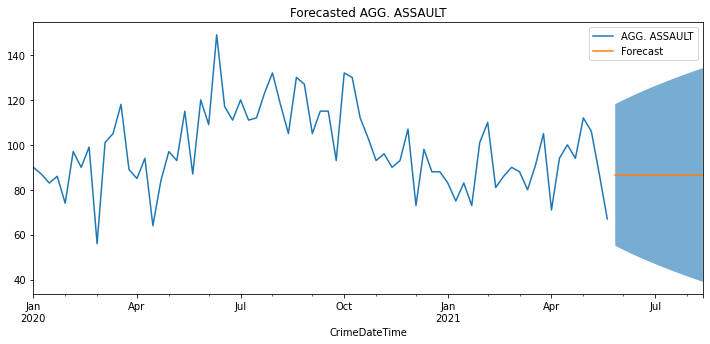

In [63]:
### PLot forecast with confidence intervals
fig,ax = plt.subplots()
ts.loc['2020':].plot(ax=ax)

forecast_df['Forecast'].plot(ax=ax)
ax.fill_between(forecast_df.index,
                forecast_df['Lower CI'], 
                forecast_df['Upper CI'],
                alpha=0.6)
ax.legend()
ax.set(title=f'Forecasted {ts.name}')

### Forecasting Functions

In [64]:
def get_df_from_pred(forecast_or_pred,forecast_label='Forecast'):
    """Takes a PredictionResultsWrapper from statsmodels
    extracts the confidence intervals and predicted mean and returns in a df"""
    forecast_df = forecast_or_pred.conf_int()
    forecast_df.columns = ['Lower CI','Upper CI']
    forecast_df[forecast_label] = forecast_or_pred.predicted_mean
    return forecast_df

def plot_forecast_from_df(forecast_df,ts_diff=None,orig_label='True Data',
                          forecast_label='Forecast',
                          last_n_lags=52,figsize=(10,4)):
    """Takes a forecast_df from get_df_from_pred and optionally 
    the training/original time series.
    
    Plots the original ts, the predicted mean and the 
    confidence invtervals (using fill between)"""
    fig,ax = plt.subplots(figsize=figsize)

    if ts_diff is not None:
        ts_diff.iloc[-last_n_lags:].plot(label='True Data')
        
   
    forecast_df['Forecast'].plot(ax=ax,label=forecast_label)
    ax.fill_between(forecast_df.index,
                    forecast_df['Lower CI'], 
                    forecast_df['Upper CI'],color='g',alpha=0.3)
    ax.legend()
    ax.set(title=f'Forecasted {ts_diff.name}')
    return fig,ax

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           AGG. ASSAULT   No. Observations:                  230
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -961.321
Date:                Sat, 29 May 2021   AIC                           1926.641
Time:                        19:04:19   BIC                           1933.509
Sample:                    01-01-2017   HQIC                          1929.412
                         - 05-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6592      0.054    -12.279      0.000      -0.764      -0.554
sigma2       258.6277     23.904     10.819      0.000     211.777     305.479
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 6.61
Prob(Q):                              0.82   Prob(JB):                         0.04
Heteroskedasticity (H):               0.91   Skew:                             0.41
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

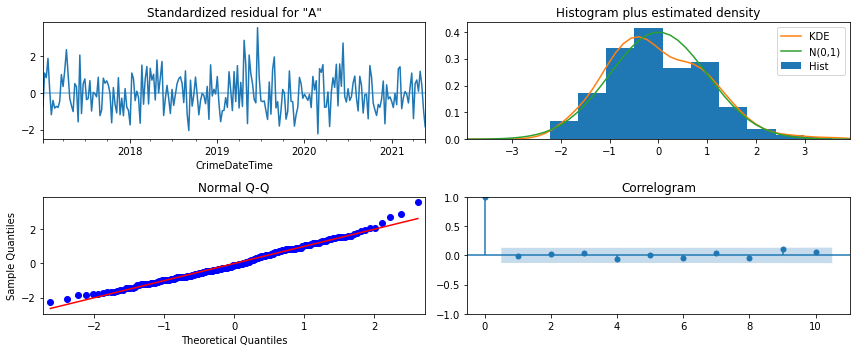

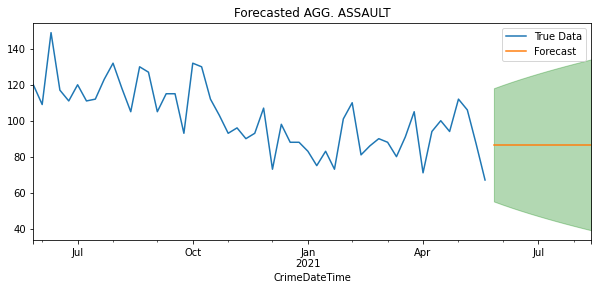

In [65]:
## Combine getting a new model, forecast_df, and plotting
model = tsa.arima.ARIMA(ts,order=tuple(best_params.values()),
                        enforce_invertibility=False,
                        enforce_stationarity=True).fit()
diagnose_model(model)
forecast = model.get_forecast(12)
forecast_df = get_df_from_pred(forecast)
plot_forecast_from_df(forecast_df,ts);

## Predictions

- `.predict/get_prediction` return a prediction for times within the original training period. (can also get into future)
    - Instead of the number of timesteps, predict needs the start and end dates for the forecast. `start=None, end=None,`
        - Note: if no times are provided, it will produce predictions for the entire training time series.

    
- Dynamic vs One-Step-Ahead Predictions:
    - Additionally, since predictions are during the same times as the actual data, we have the option to get dynamic/non-dynamic forecasts.
    - `dynamic=True`: will behave like a forecast where each step in time is predicted based on the previously predicted time. 
    - `dynamic=False`: will ONLY predict one step ahead in time, so the predictions for all data points were ONLY guessing 1 step ahead for each point. 

In [66]:
## Get one-step-ahead preditions for the last 12 weeks of the dataset
one_step_ahead_mean = model.predict(start=-12, end=-1,dynamic=False)
one_step_ahead_mean

CrimeDateTime
2021-03-07 00:00:00+00:00     89.157
2021-03-14 00:00:00+00:00     88.763
2021-03-21 00:00:00+00:00     85.777
2021-03-28 00:00:00+00:00     87.557
2021-04-04 00:00:00+00:00     93.501
2021-04-11 00:00:00+00:00     85.833
2021-04-18 00:00:00+00:00     88.616
2021-04-25 00:00:00+00:00     92.495
2021-05-02 00:00:00+00:00     93.008
2021-05-09 00:00:00+00:00     99.480
2021-05-16 00:00:00+00:00    101.702
2021-05-23 00:00:00+00:00     96.692
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [67]:
## get_prediction from model
one_step_ahead_prediction = model.get_prediction(start=-12,end=-1,dynamic=False)
one_step_ahead_prediction

In [68]:
## conf_int
one_step_ahead_prediction.conf_int()

lower AGG. ASSAULT  upper AGG. ASSAULT
CrimeDateTime                                                    
2021-03-07 00:00:00+00:00              57.637             120.677
2021-03-14 00:00:00+00:00              57.243             120.283
2021-03-21 00:00:00+00:00              54.257             117.297
2021-03-28 00:00:00+00:00              56.037             119.077
2021-04-04 00:00:00+00:00              61.981             125.021
2021-04-11 00:00:00+00:00              54.313             117.353
2021-04-18 00:00:00+00:00              57.096             120.136
2021-04-25 00:00:00+00:00              60.975             124.015
2021-05-02 00:00:00+00:00              61.488             124.528
2021-05-09 00:00:00+00:00              67.960             131.000
2021-05-16 00:00:00+00:00              70.182             133.222
2021-05-23 00:00:00+00:00              65.172             128.212

In [69]:
## Also contains the .predicted mean
one_step_ahead_prediction.predicted_mean

CrimeDateTime
2021-03-07 00:00:00+00:00     89.157
2021-03-14 00:00:00+00:00     88.763
2021-03-21 00:00:00+00:00     85.777
2021-03-28 00:00:00+00:00     87.557
2021-04-04 00:00:00+00:00     93.501
2021-04-11 00:00:00+00:00     85.833
2021-04-18 00:00:00+00:00     88.616
2021-04-25 00:00:00+00:00     92.495
2021-05-02 00:00:00+00:00     93.008
2021-05-09 00:00:00+00:00     99.480
2021-05-16 00:00:00+00:00    101.702
2021-05-23 00:00:00+00:00     96.692
Freq: W-SUN, Name: predicted_mean, dtype: float64

Text(0.5, 1.02, 'One Step Ahead')

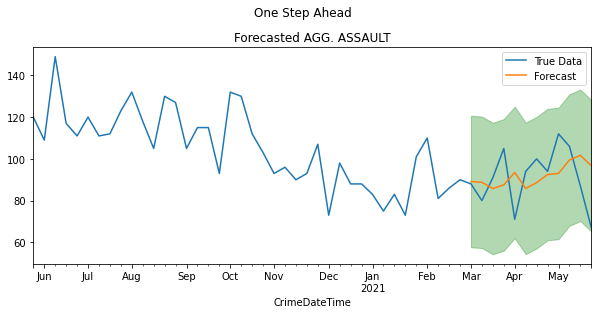

In [70]:
## plot one step ahead forecasat
one_step_ahead_prediction = model.get_prediction(start=-12,end=-1,dynamic=False)
forecast_df = get_df_from_pred(one_step_ahead_prediction)
f,ax = plot_forecast_from_df(forecast_df,ts)
f.suptitle('One Step Ahead',y=1.02)

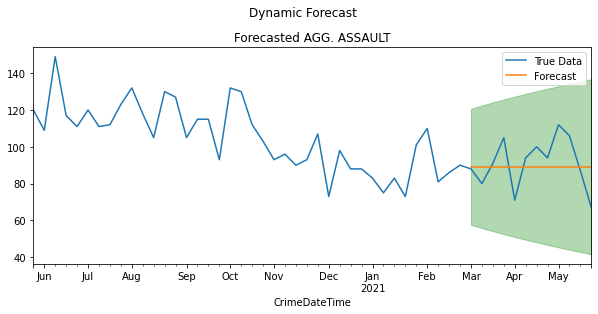

In [71]:
## Using the above functions, get a dyanmic prediction and plot
one_step_ahead_prediction = model.get_prediction(start=-12,end=-1,dynamic=True)
forecast_df = get_df_from_pred(one_step_ahead_prediction)
f,ax = plot_forecast_from_df(forecast_df,ts)
f.suptitle('Dynamic Forecast',y=1.02);

> #### Q: What do we notice about the dynamic vs non-dynamic predictions?


___

# SARIMA & SARIMAX MODELS:


### SARIMA Models

- Seasonal ARIMA Models add a longer/larger seasonal ARIMA model combined with a non-seasonal ARIMA model.

* `(p, d, q)` are the non-seasonal parameters described above.
* `(P, D, Q)` follow the same definition but are applied to the seasonal component of the time series. 
* The term `s` a.k.a. `m` is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).

A detailed article on these parameters is available [HERE](https://www.quantstart.com/articles/Autoregressive-Integrated-Moving-Average-ARIMA-p-d-q-Models-for-Time-Series-Analysis).

- Note: we will use the `SARIMAX` model from statsmodels, which allows for another variable (`X` aka exog) to be used in the modeling.

In [72]:
pdq = tuple(best_params.values())
pdq

(0.0, 1.0, 1.0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           AGG. ASSAULT   No. Observations:                  230
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -961.321
Date:                Sat, 29 May 2021   AIC                           1926.641
Time:                        19:04:21   BIC                           1933.509
Sample:                    01-01-2017   HQIC                          1929.412
                         - 05-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6592      0.054    -12.279      0.000      -0.764      -0.554
sigma2       258.6277     23.904     10.819      0.000     211.777     305.479
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 6.61
Prob(Q):                              0.82   Prob(JB):                         0.04
Heteroskedasticity (H):               0.91   Skew:                             0.41
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

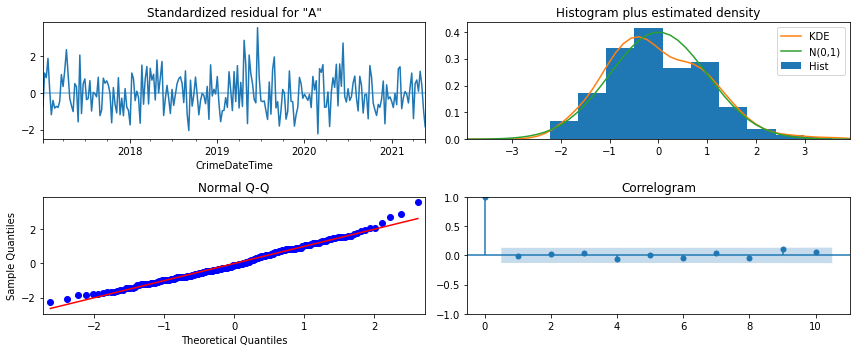

In [73]:
## Make a SARIMAZ model using best pdq from ARIMA.
sarimax_model = tsa.SARIMAX(ts,order=pdq,enforce_invertibility=False).fit()
diagnose_model(sarimax_model)

> **Q: Does the seasonal ARIMA with seasonal order= (0,0,0,0)look familiar?**

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           AGG. ASSAULT   No. Observations:                  230
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -961.321
Date:                Sat, 29 May 2021   AIC                           1926.641
Time:                        19:04:22   BIC                           1933.509
Sample:                    01-01-2017   HQIC                          1929.412
                         - 05-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6592      0.054    -12.279      0.000      -0.764      -0.554
sigma2       258.6277     23.904     10.819      0.000     211.777     305.479
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 6.61
Prob(Q):                              0.82   Prob(JB):                         0.04
Heteroskedasticity (H):               0.91   Skew:                             0.41
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

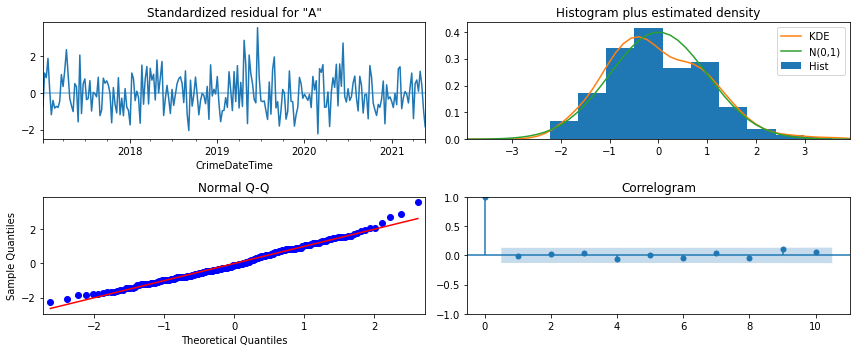

In [74]:
## Copy the above code and replace the SARIMAX with .arima.ARIMA
compare_model = tsa.arima.ARIMA(ts,order=pdq,enforce_invertibility=False).fit()
diagnose_model(compare_model)

## Selecting Seasonal Orders

- Figuring out the seasonal component can be tricky. 
- For one, we have to know the value for $m$, which is how many time steps should be considered a season. 
    - Use seasonal decompose to look for potential seasonality/$m$

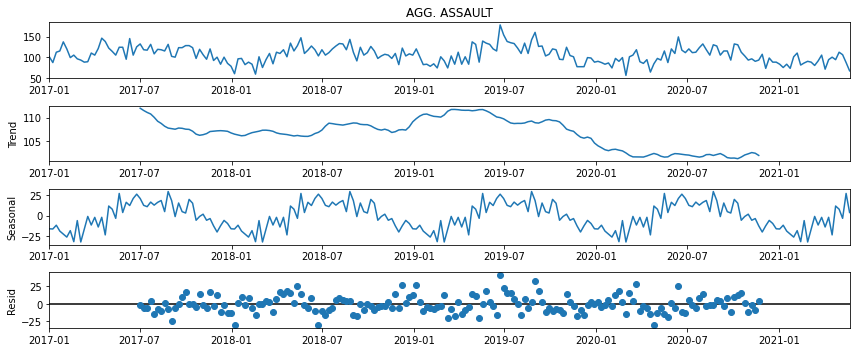

In [75]:
## use seasonal decompose and plot to look for m
decomp = tsa.seasonal_decompose(ts)
decomp.plot();

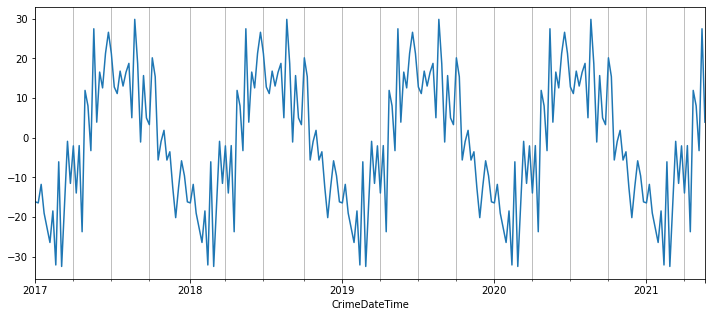

In [76]:
## Plot JUST the seasonal component and add a grid 
ax = decomp.seasonal.plot()
ax.grid(axis='x',which='both')

- Using the value for $m$ inferred above, try making a SARIMAX model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       AGG. ASSAULT   No. Observations:                  230
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 52)   Log Likelihood                -959.206
Date:                            Sat, 29 May 2021   AIC                           1926.413
Time:                                    19:04:26   BIC                           1940.147
Sample:                                01-01-2017   HQIC                          1931.954
                                     - 05-23-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6792      0.053    -12.745      0.000      -0.784      -0.575
ar.S.L52       0.3310      0.632      0.524      0.600      -0.907       1.569
ma.S.L52      -0.1865      0.650     -0.287      0.774      -1.461       1.088
sigma2       252.4693     22.804     11.071      0.000     207.773     297.165
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.48
Prob(Q):                              0.95   Prob(JB):                         0.01
Heteroskedasticity (H):               0.92   Skew:                             0.46
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Forecasted AGG. ASSAULT'}, xlabel='CrimeDateTime'>)

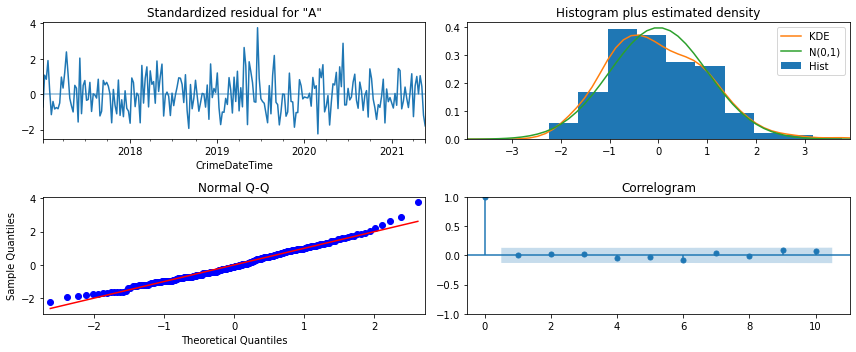

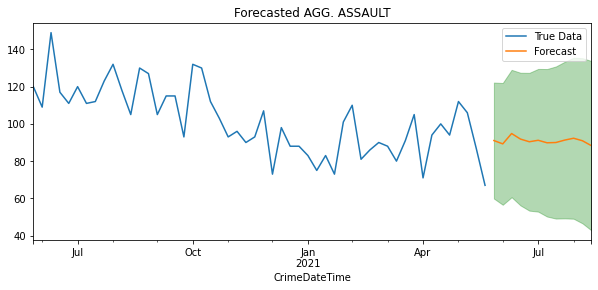

In [77]:
## using all of our functions to train our model, get and plot forecast
sarimax_model = tsa.SARIMAX(ts,order=pdq,seasonal_order=(1,0,1,52),
                            enforce_invertibility=False).fit()
diagnose_model(sarimax_model)
forecast = sarimax_model.get_forecast(steps=12)
forecast_df = get_df_from_pred(forecast)
plot_forecast_from_df(forecast_df,ts)

### Functionize Entire  process

In [78]:
def evaluate_model(model,ts,test_ts=None, last_n_lags =52,steps=12):
    diagnose_model(model)
    
    forecast = model.get_forecast(steps=steps)
    forecast_df = get_df_from_pred(forecast,)
    
    fig, ax = plot_forecast_from_df(forecast_df,ts_diff=ts,
                                    last_n_lags=last_n_lags)
    
    if test_ts:
        test_ts.plot(ax=ax)
    return fig,ax

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       AGG. ASSAULT   No. Observations:                  230
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 52)   Log Likelihood                -959.447
Date:                            Sat, 29 May 2021   AIC                           1924.894
Time:                                    19:04:28   BIC                           1935.195
Sample:                                01-01-2017   HQIC                          1929.050
                                     - 05-23-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6757      0.053    -12.718      0.000      -0.780      -0.572
ma.S.L52       0.1367      0.074      1.842      0.065      -0.009       0.282
sigma2       253.2896     22.899     11.061      0.000     208.408     298.171
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.16
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               0.92   Skew:                             0.45
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Forecasted AGG. ASSAULT'}, xlabel='CrimeDateTime'>)

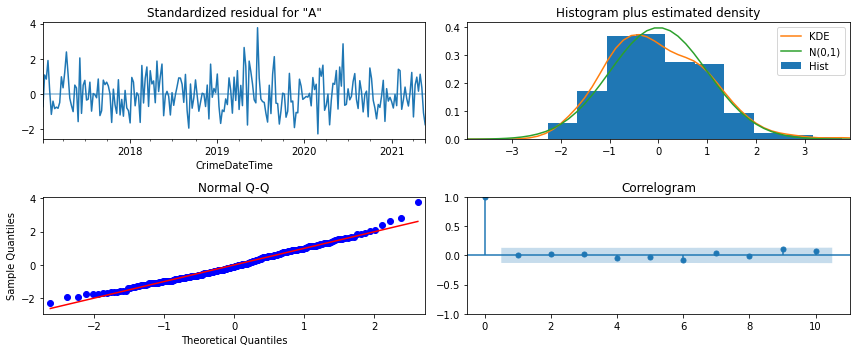

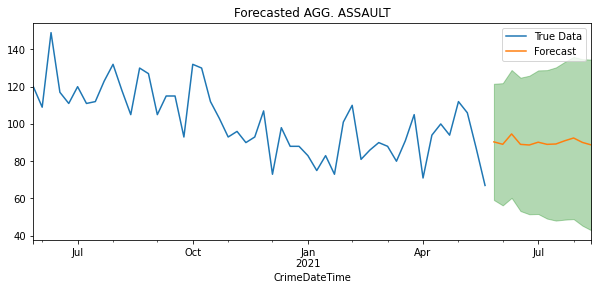

In [79]:
## Test functionizing process
ts = dfw['AGG. ASSAULT'].copy()
model =tsa.SARIMAX(ts,order=(0,1,1),seasonal_order=(0,0,1,52),
                            enforce_invertibility=False).fit()
evaluate_model(model,ts)

## `pmdarima.auto_arima`

- While we could construct another loop/grid and add a seasonal PDQ list to iterate through (see the SARIMAX Lab for example).
- There is a package called `pmdarima` which makes an auto-arima model for python (like there is for R)
    - http://alkaline-ml.com/pmdarima/

In [80]:
# !pip install -U pmdarima
import pmdarima as pmd
# help(pmd.auto_arima)

<AxesSubplot:xlabel='CrimeDateTime'>

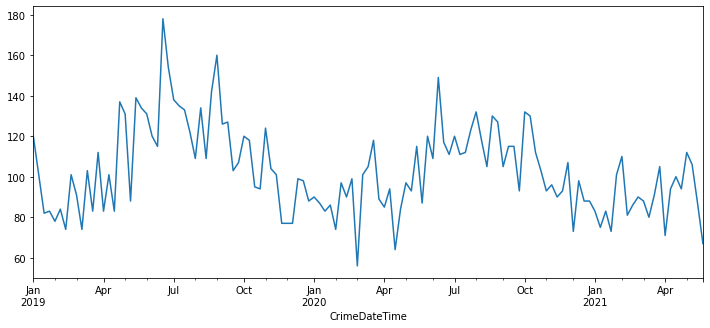

In [81]:
## Cut down ts to 2019-present (for time sake)
ts = ts.loc['2019':]
ts.plot()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  125
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -527.228
Date:                Sat, 29 May 2021   AIC                           1058.456
Time:                        19:04:36   BIC                           1064.097
Sample:                             0   HQIC                          1060.748
                                - 125                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6613      0.079     -8.389      0.000      -0.816      -0.507
sigma2       287.4725     34.063      8.439      0.000     220.709     354.236
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.17
Prob(Q):                              0.83   Prob(JB):                         0.02
Heteroskedasticity (H):               0.49   Skew:                             0.59
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

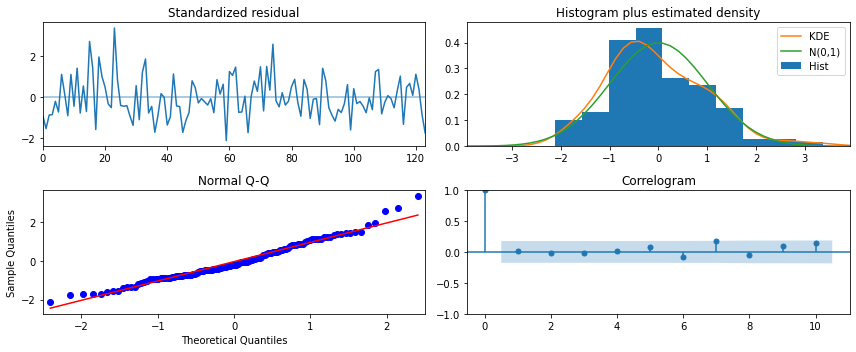

In [82]:
## Use auto_arima 
auto_model = pmd.auto_arima(ts,start_p=0,start_q=0,d=1,
                            max_p=4,max_q=4,
                            max_P=3,max_Q=3,
                            start_P=0,start_Q=0,
                            m=52,
                            verbose=2)
diagnose_model(auto_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           AGG. ASSAULT   No. Observations:                  125
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -527.228
Date:                Sat, 29 May 2021   AIC                           1058.456
Time:                        19:04:37   BIC                           1064.097
Sample:                    01-06-2019   HQIC                          1060.748
                         - 05-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6613      0.079     -8.388      0.000      -0.816      -0.507
sigma2       287.4855     34.067      8.439      0.000     220.716     354.255
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.17
Prob(Q):                              0.83   Prob(JB):                         0.02
Heteroskedasticity (H):               0.49   Skew:                             0.59
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

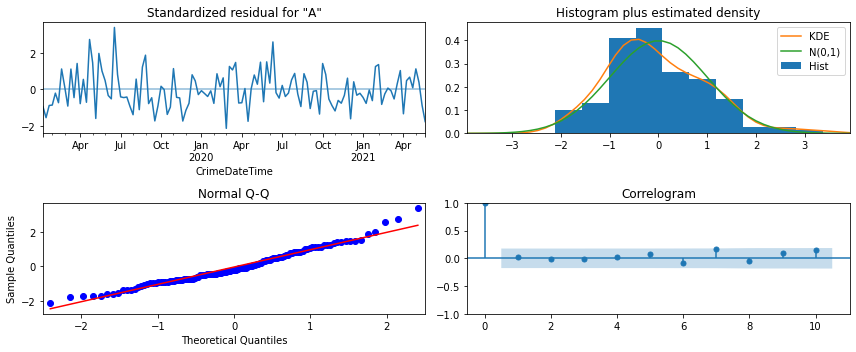

In [83]:
## Make a sarimax using params from auto_model
model = tsa.SARIMAX(ts,order=auto_model.order, 
                seasonal_order =auto_model.seasonal_order,
                enforce_invertibility=False,freq='W').fit()


diagnose_model(model)


# Activity: Modeling with Crimes

- Using the examples we've made in this notebook:
    - Select a crime from our original df.
    - Create a train/test/ split.
    - Train/tune a model using the training data. 
    - Get the model's forecast for the test data's period. 
    - Plot the model's forecast vs actual test data.

In [84]:
px.line(dfw)

<AxesSubplot:xlabel='CrimeDateTime'>

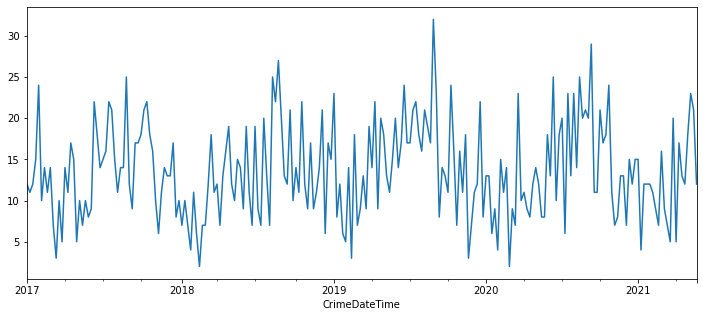

In [85]:
## save chosen ts as var
ts = dfw['SHOOTING'].copy()
ts.plot()

In [86]:
# do a train-test-split
tts_cutoff = round(ts.shape[0]*0.90)
tts_cutoff

207

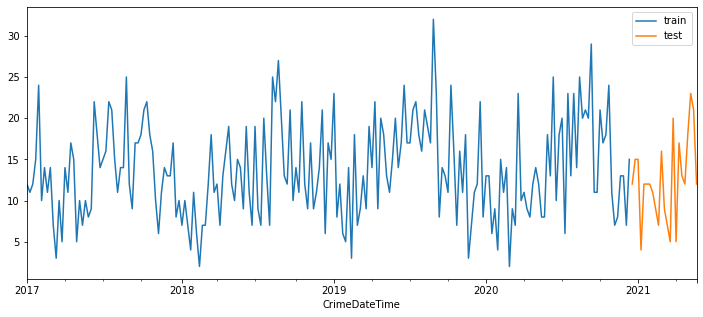

In [87]:
## Do Train test split and plot
train = ts.iloc[:tts_cutoff]
test = ts.iloc[tts_cutoff:]

ax = train.plot(label='train')
test.plot(label='test')
ax.legend()

(<Figure size 648x432 with 2 Axes>, <AxesSubplot:xlabel='CrimeDateTime'>)

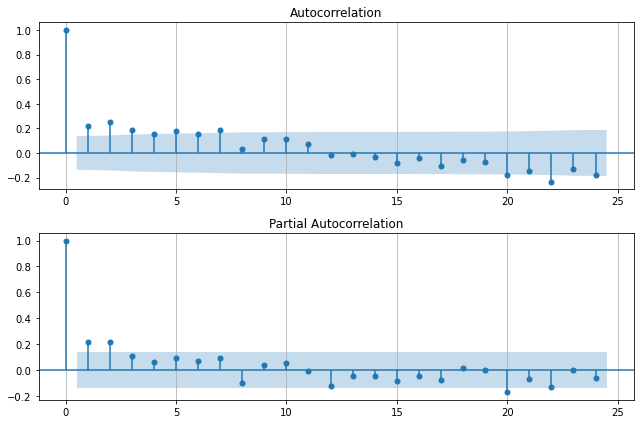

In [88]:
### Check PACF/ACF to infer p/q (if possible)
plot_acf_pacf(train)

(<Figure size 648x432 with 2 Axes>, <AxesSubplot:xlabel='CrimeDateTime'>)

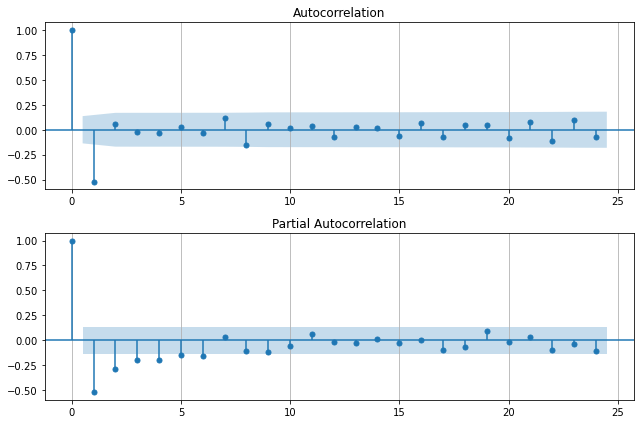

In [89]:
### Check PACF/ACF to infer p/q (if possible)
plot_acf_pacf(train.diff().dropna())

- Possible values:
    - p:2,3,4
    - d:
    - q:1,2,3,4

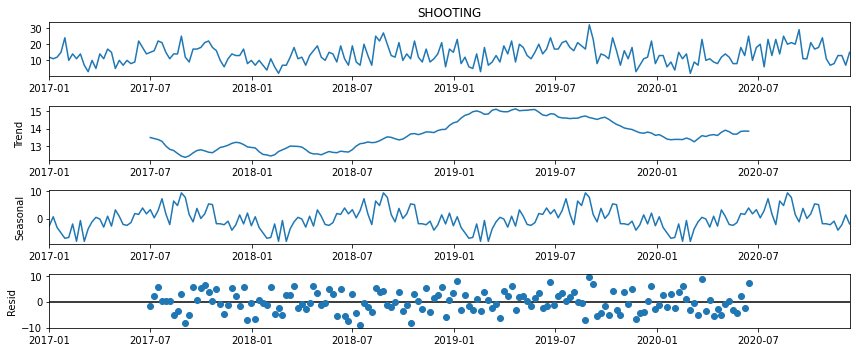

In [90]:
## Use Seasonal Decompose to check for seasonality 
tsa.seasonal_decompose(train).plot();

(<Figure size 648x432 with 2 Axes>, <AxesSubplot:xlabel='CrimeDateTime'>)

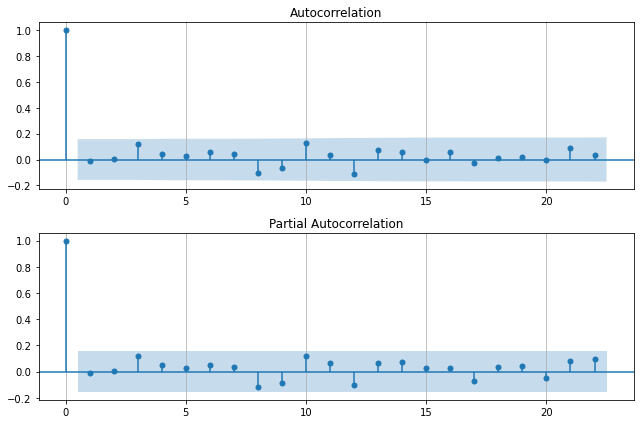

In [91]:
plot_acf_pacf(train.diff(52).dropna())

In [92]:
## Get forecast steps from test
steps = len(test)
steps

23

<AxesSubplot:xlabel='CrimeDateTime'>

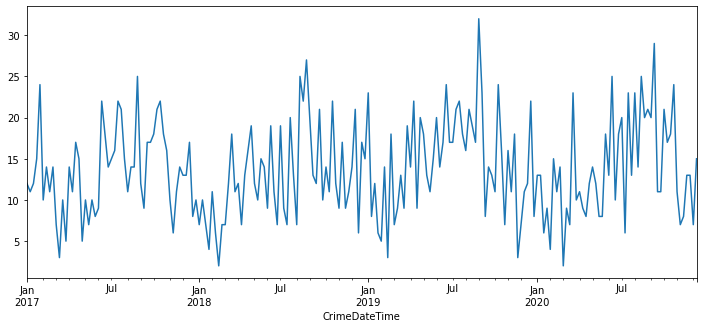

In [93]:
train.plot()

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/pmdarima/arima/_validation.py:76: UserWarning:

stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               SHOOTING   No. Observations:                  207
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -646.701
Date:                Sat, 29 May 2021   AIC                           1297.401
Time:                        19:04:56   BIC                           1304.057
Sample:                    01-01-2017   HQIC                          1300.093
                         - 12-13-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7990      0.046    -17.506      0.000      -0.889      -0.710
sigma2        31.0570      3.384      9.176      0.000      24.424      37.691
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 3.15
Prob(Q):                              0.70   Prob(JB):                         0.21
Heteroskedasticity (H):               1.64   Skew:                             0.25
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'Forecasted SHOOTING'}, xlabel='CrimeDateTime'>

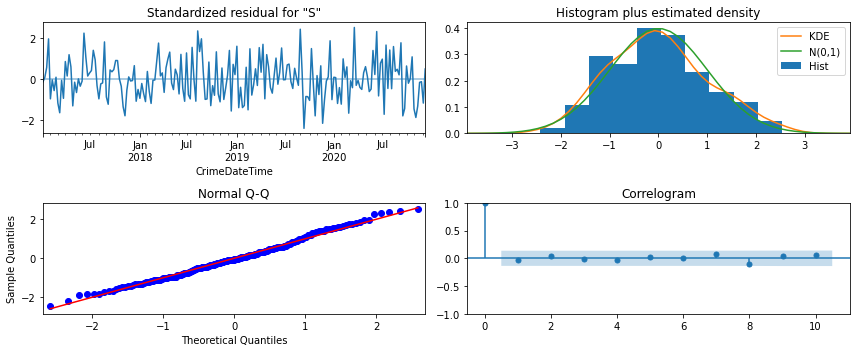

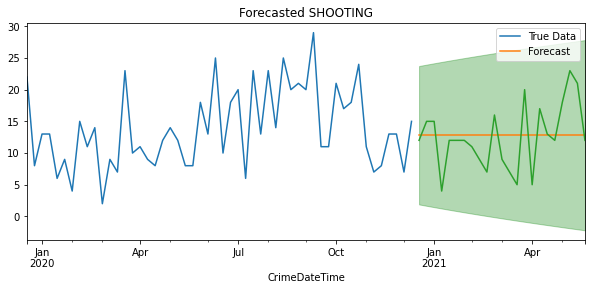

In [94]:
## Fit a model and evaluate
auto_model = pmd.auto_arima(train,start_p=0,max_p=5,
                           start_q=0,max_q=5,d=1,m=52,
                           start_P=0,start_Q=0,n_jobs=-1)
model = tsa.SARIMAX(train,order=auto_model.order,
                seasonal_order = auto_model.seasonal_order,
                enforce_invertibility=False).fit()
f,ax=evaluate_model(model,train,steps=steps)
test.plot(ax=ax)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               SHOOTING   No. Observations:                  230
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -717.084
Date:                Sat, 29 May 2021   AIC                           1438.168
Time:                        19:04:58   BIC                           1445.035
Sample:                    01-01-2017   HQIC                          1440.938
                         - 05-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7985      0.043    -18.606      0.000      -0.883      -0.714
sigma2        30.5826      3.158      9.683      0.000      24.392      36.773
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 3.48
Prob(Q):                              0.58   Prob(JB):                         0.18
Heteroskedasticity (H):               1.42   Skew:                             0.24
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

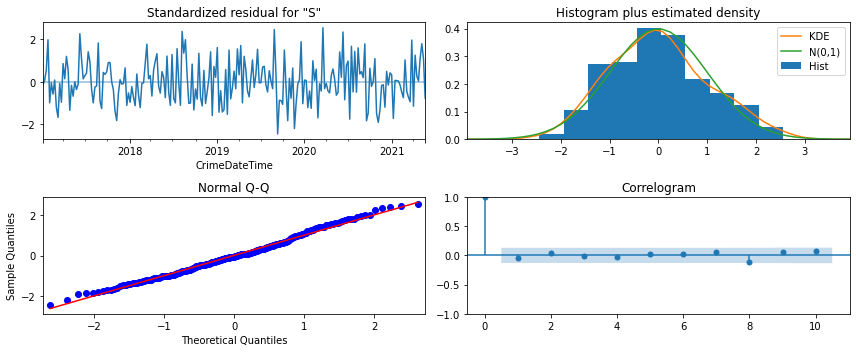

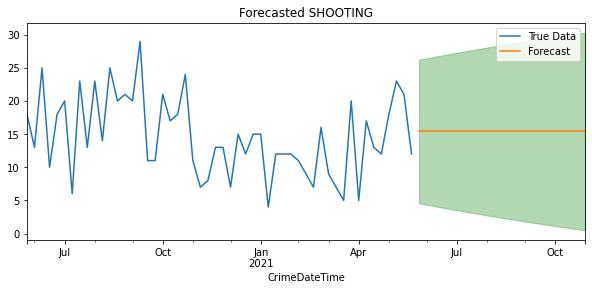

In [95]:
## If happy with the model's test perforamance, retrain on entire ts and forecast into future
model = tsa.SARIMAX(ts,order=auto_model.order,
                seasonal_order = auto_model.seasonal_order,
                enforce_invertibility=False).fit()
f,ax=evaluate_model(model,ts,steps=steps)

# APPENDIX

### Old Functions

In [96]:
### FORECAST SPECIFIC FUNCTIONS

def get_forecast(model,steps=12):
    pred = model.get_forecast(steps=steps)
    forecast = pred.conf_int()
    forecast.columns = ['Lower CI','Upper CI']
    forecast['Forecast'] = pred.predicted_mean
    return forecast

    
def plot_forecast(model,ts,last_n_lags=52,future_steps=12):
    forecast_df = get_forecast(model,steps=future_steps)

    fig,ax = plt.subplots(figsize=(12,5))
    ts.iloc[-last_n_lags:].plot(label='True Data')
    forecast_df['Forecast'].plot(ax=ax)
    ax.fill_between(forecast_df.index,
                    forecast_df['Lower CI'], forecast_df['Upper CI'],alpha=0.6)
    ax.legend()
    ax.set(title=f'Forecasted {ts.name}')
    return fig,ax


def evaluate_model(model,ts,last_n_lags =52,steps=12):
    display(model.summary())
    model.plot_diagnostics();
    fig,ax=plot_forecast(model,ts,future_steps=steps,last_n_lags=last_n_lags)
    return fig,ax

## Cross Validation with Time Series

In [97]:

from sklearn.model_selection._split import _BaseKFold

class BlockTimeSeriesSplit(_BaseKFold): #sklearn.model_selection.TimeSeriesSplit):
    """A variant of sklearn.model_selection.TimeSeriesSplit that keeps train_size and test_size
    constant across folds. 
    Requires n_splits,train_size,test_size. train_size/test_size can be integer indices or float ratios """
    def __init__(self, n_splits=5,train_size=None, test_size=None, step_size=None, method='sliding'):
        super().__init__(n_splits, shuffle=False, random_state=None)
        self.train_size = train_size
        self.test_size = test_size
        self.step_size = step_size
        if 'sliding' in method or 'normal' in method:
            self.method = method
        else:
            raise  Exception("Method may only be 'normal' or 'sliding'")
        
    def split(self,X,y=None, groups=None):
        import math 
        method = self.method
        ## Get n_samples, trian_size, test_size, step_size
        n_samples = len(X)
        test_size = self.test_size
        train_size =self.train_size
      
                
        ## If train size and test sze are ratios, calculate number of indices
        if train_size<1.0:
            train_size = math.floor(n_samples*train_size)
        
        if test_size <1.0:
            test_size = math.floor(n_samples*test_size)
            
        ## Save the sizes (all in integer form)
        self._train_size = train_size
        self._test_size = test_size
        
        ## calcualte and save k_fold_size        
        k_fold_size = self._test_size + self._train_size
        self._k_fold_size = k_fold_size    
        

    
        indices = np.arange(n_samples)
        
        ## Verify there is enough data to have non-overlapping k_folds
        if method=='normal':
            import warnings
            if n_samples // self._k_fold_size <self.n_splits:
                warnings.warn('The train and test sizes are too big for n_splits using method="normal"\n\
                switching to method="sliding"')
                method='sliding'
                self.method='sliding'
                              
                  
            
        if method=='normal':

            margin = 0
            for i in range(self.n_splits):

                start = i * k_fold_size
                stop = start+k_fold_size

                ## change mid to match my own needs
                mid = int(start+self._train_size)
                yield indices[start: mid], indices[mid + margin: stop]
        

        elif method=='sliding':
            
            step_size = self.step_size
            if step_size is None: ## if no step_size, calculate one
                ## DETERMINE STEP_SIZE
                last_possible_start = n_samples-self._k_fold_size #index[-1]-k_fold_size)\
                step_range =  range(last_possible_start)
                step_size = len(step_range)//self.n_splits
            self._step_size = step_size
                
            
            for i in range(self.n_splits):
                if i==0:
                    start = 0
                else:
                    start = prior_start+self._step_size #(i * step_size)

                stop =  start+k_fold_size            
                ## change mid to match my own needs
                mid = int(start+self._train_size)
                prior_start = start
                yield indices[start: mid], indices[mid: stop]


In [98]:
from sklearn.model_selection import (TimeSeriesSplit,train_test_split,
                                     GridSearchCV,cross_val_score,KFold)


### Using `BlockTimeSeriesSplit`

In [99]:
## BlockTimeSeriesSplit 
split_ts = BlockTimeSeriesSplit(n_splits = 5, 
                                train_size=0.3,
                                test_size=0.1,
                                method='sliding')#train_size=840, test_size=10*7)

In [100]:
master_date_index = ts.index.to_series()
n=0

for train_index,test_index in split_ts.split(ts):
    train_ts = master_date_index.iloc[train_index]
    test_date_index = master_date_index.iloc[test_index]
    train = ts
#
    n+=1

In [101]:
# master_date_index=df_to_model.index.to_series()

# n=0
# dashes = '---'*20
# for train_index, test_index in split_ts.split(df_to_model):  
    
#     print(f'\n{dashes}\nsplit {n}')
#     train_date_index = master_date_index.iloc[train_index]
#     test_date_index = master_date_index.iloc[test_index]
#     ji.index_report(train_date_index)
#     ji.index_report(test_date_index)
#     n+=1